# Part 1 - Prosper Loan Data Exploration

## by Thayne Campbell

## Introduction
> This document explores the dataset for the Loan Data from Prosper. It contains such information as loan amounts, borrower rates, current loan statuses, borrower incomes, and much more.

In [793]:
# import necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [794]:
# load in the dataset
loans = pd.read_csv('prosperLoanData.csv')

In [795]:
# Overview of data shape and contents
print(loans.shape)
print(loans.dtypes)
print(loans.dtypes.value_counts())
#print(loans.head())


(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
float64    50
object     17
int64      11
bool        3
dtype: int64


### What is the structure of your dataset?
This data contains 113,937 rows representing individual loan data, with 81 columns of associated variables (Loan status, borrower rate, borrower state, etc.). Most of the variables contained are numeric (float64 dtype) due to the dataset revolving around finances. 

### What are the main features of interest in your dataset?
What I'm most interested in with this dataset is the correlation between differing variables concerning the borrowers of the loans and how these affect the borrowers loan amounts and interest rates.

### What features in the dataset do you think will help support your investigation into your features of interest?
I believe that any information regarding the borrower's personal financial standing (such as field of employment, home ownership, monthly income) will hold a great impact over the terms of their loan, with credit scores and number of delinquencies playing a major part.  

## Univariate Exploration
let's start by looking at the the loan amounts.

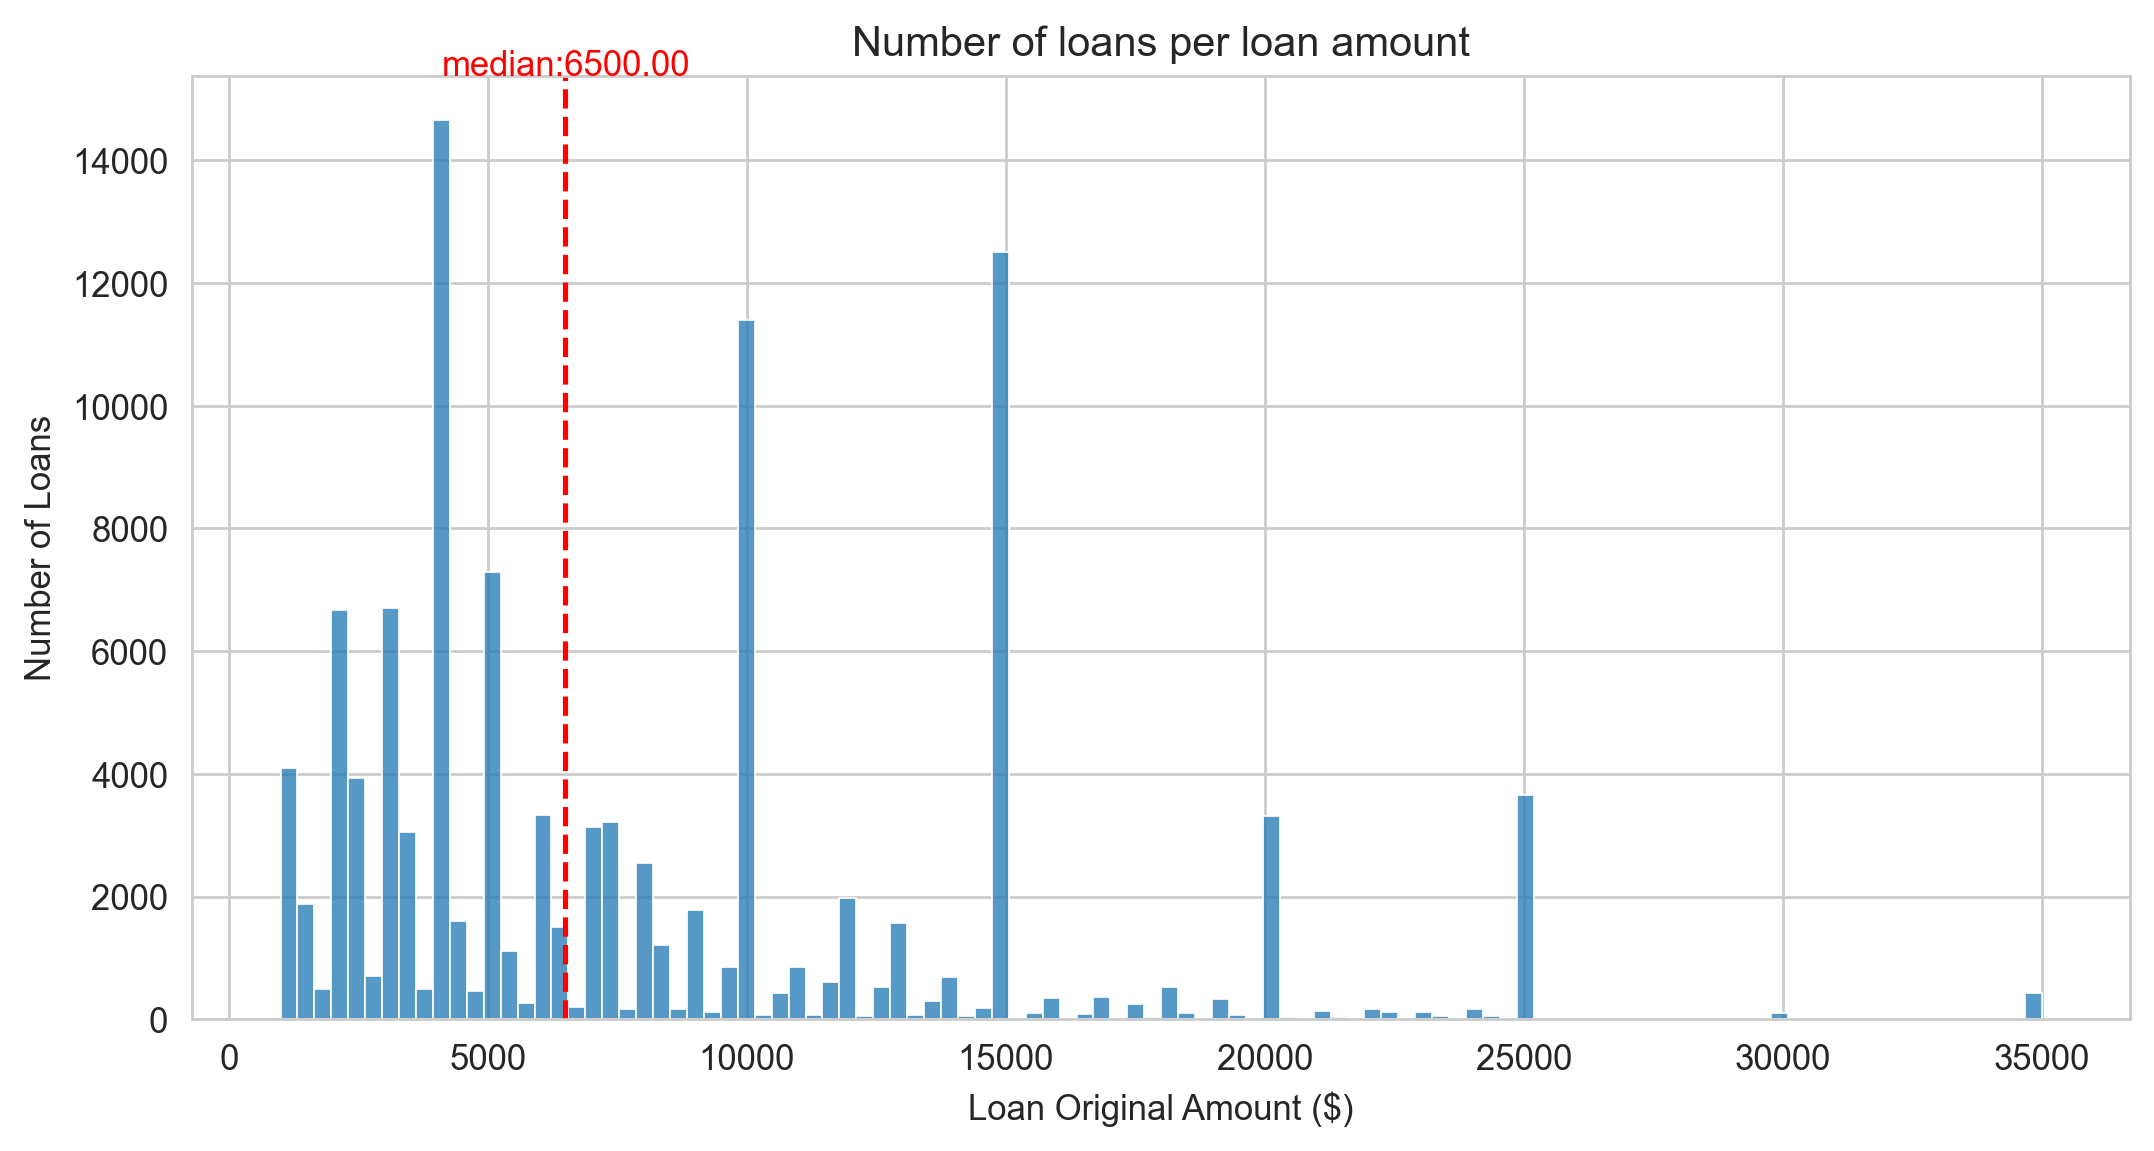

In [796]:
# create a figure with 1 subplot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
sns.set_style('whitegrid')
#use seaborn to create a histogram
sns.histplot(data=loans['LoanOriginalAmount'], ax=axes)
# plot a line to show the median loan amount
median = np.median(loans['LoanOriginalAmount'])
axes.axvline(median, color='r', linestyle='--')
axes.text(median, axes.get_ylim()[1]-2,f"median:{median:.2f}", ha='center',color='r')
# fix axis labels for readability
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of Loans')
plt.title('Number of loans per loan amount');

Here we can see the distribution of loan amounts across the dataset, with a median loan amount of 6500. This data has a long tail to the right due to some larger loans, so we will transform this to a log scale for a better look at the distribution.

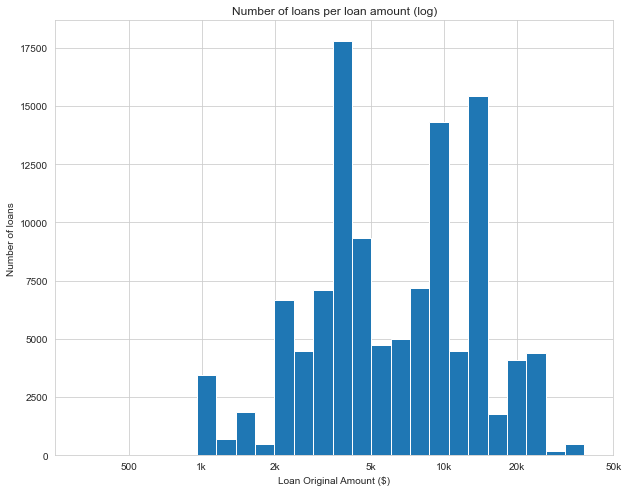

In [797]:
# the long tail in the distribution calls for a log scale of the same data
log_binsize = 0.08
bins = 10 ** np.arange(2.5, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10,8])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins );
plt.xscale('log')
#set the x ticks to account for the new log scaling
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k','50k'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of loans');
plt.title('Number of loans per loan amount (log)');


The Loan Original Amount data has a long-tailed distribution due to the majority of loans being below 10k, with a small handful of loans sitting around the 30K-35k mark. Plotting this instead on a log-scale shows us a somewhat bimodal distribution, with a peak around 4k and peaks again around 10k and 15k. It is interesting to see that there is a sharp drop in the number of loans granted between 4k and 10k before jumping back up again. 

Next, let's look at the borrower's income ranges.


In [798]:
#first, lets change the income range to Categorical so that we can order them correctly.
income_order_dict = {'IncomeRange': ['Not displayed', 'Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for i in income_order_dict:
    income_ordered = pd.api.types.CategoricalDtype(ordered=True, categories = income_order_dict[i])
    
    loans[i] = loans[i].astype(income_ordered)
    

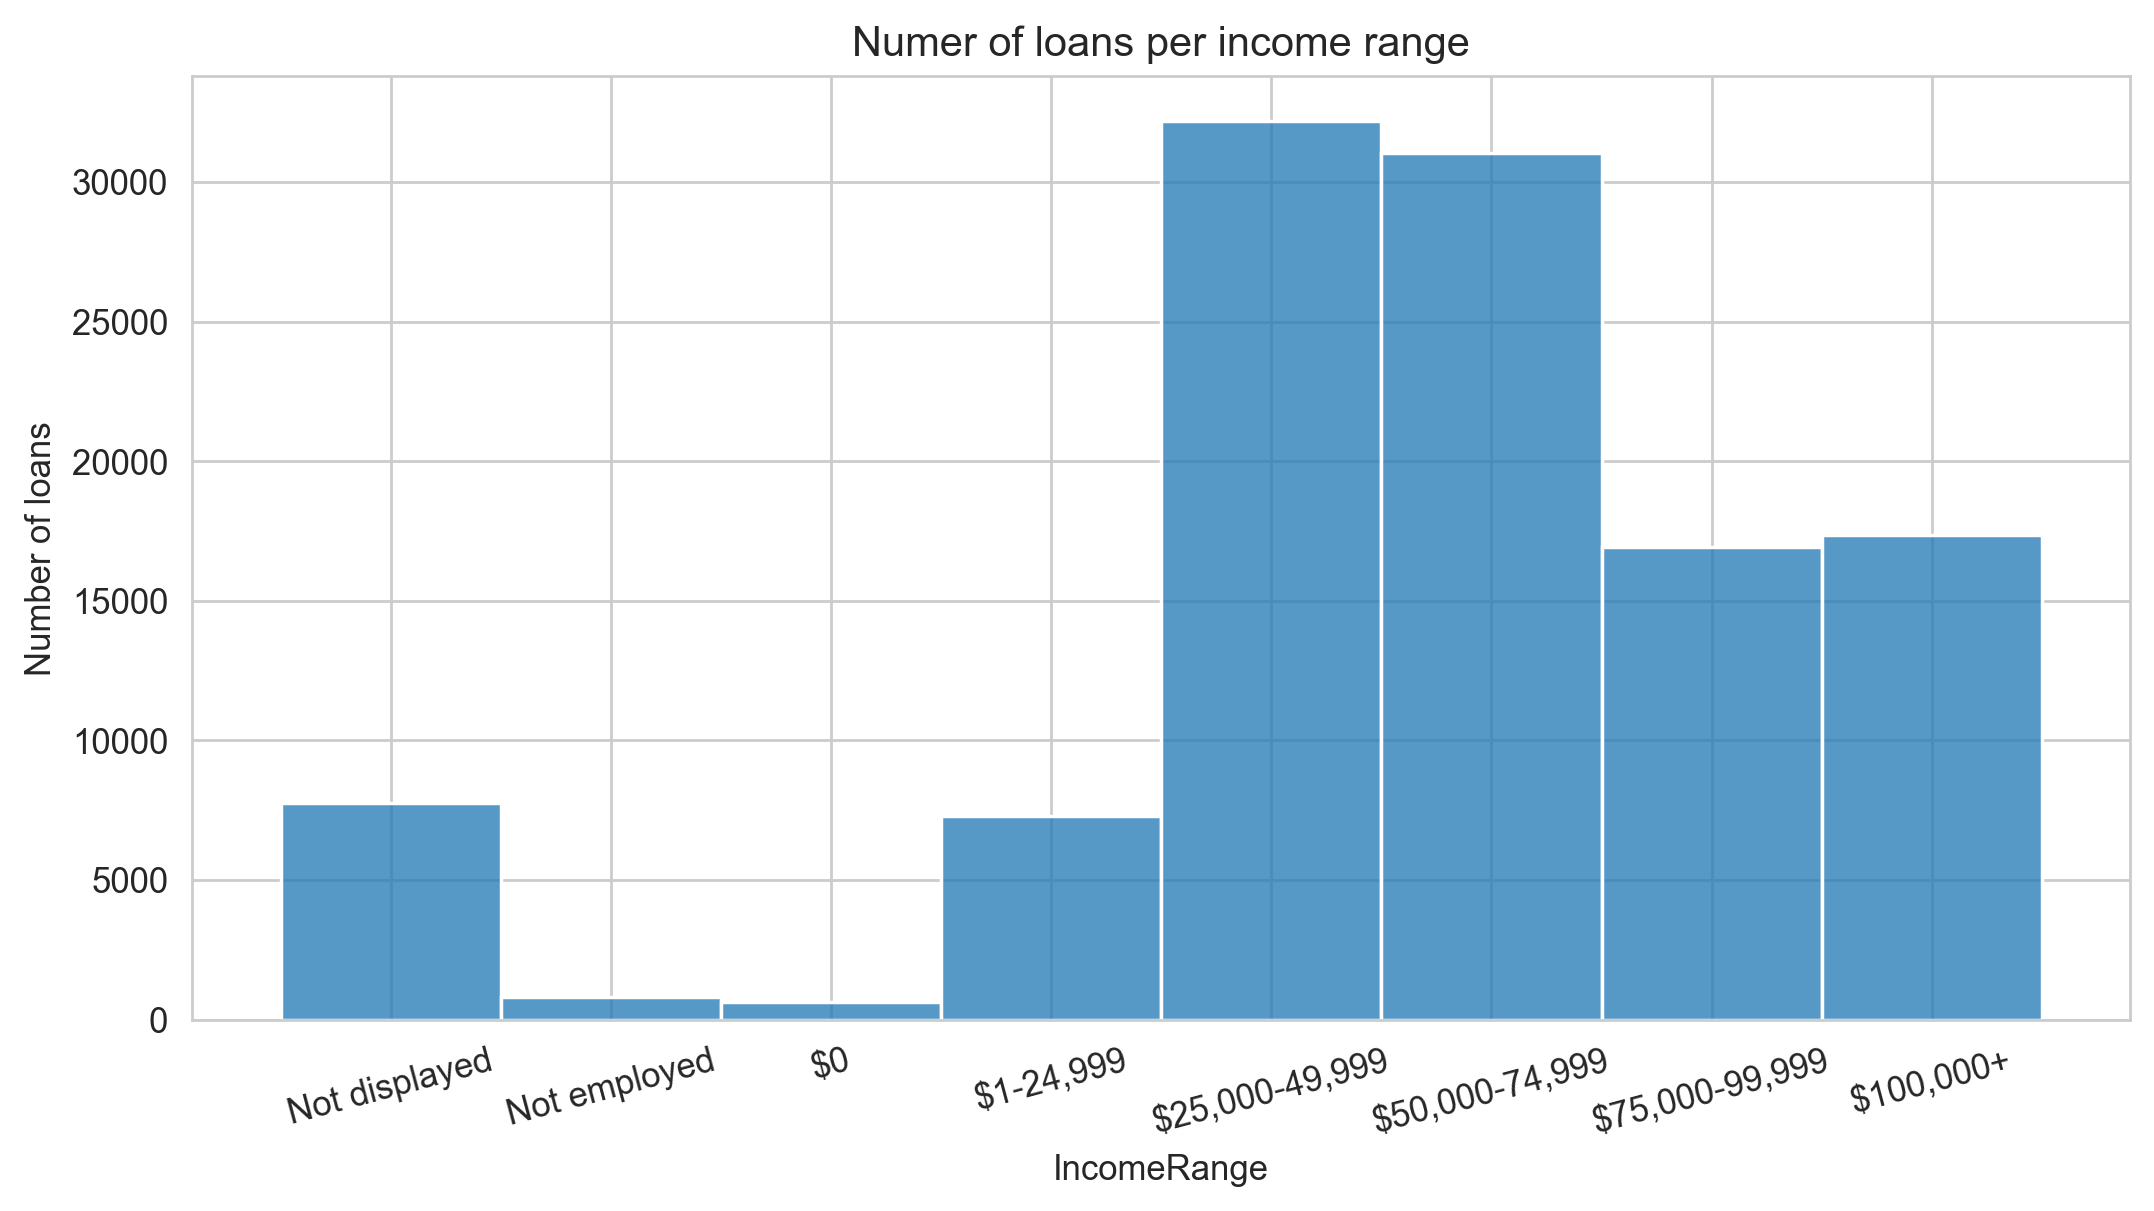

In [799]:
#set subplot size for easy readability, then plot the data in the correct categorical order.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
sns.histplot(data=loans['IncomeRange'], ax=axes);
#rotate the x axis labels to avoid overlap
plt.xticks(rotation = 15);
plt.ylabel('Number of loans');
plt.title('Numer of loans per income range');

Here we can see that the majority of borrowers listed their income range between 25,000 and 75,000, with a surprising amount of borrowers in the 100,000+ category. It will be interesting to see the loan amounts in relation to the income ranges.

Now I want to find out where the majority of these loans are coming from *geographically*.

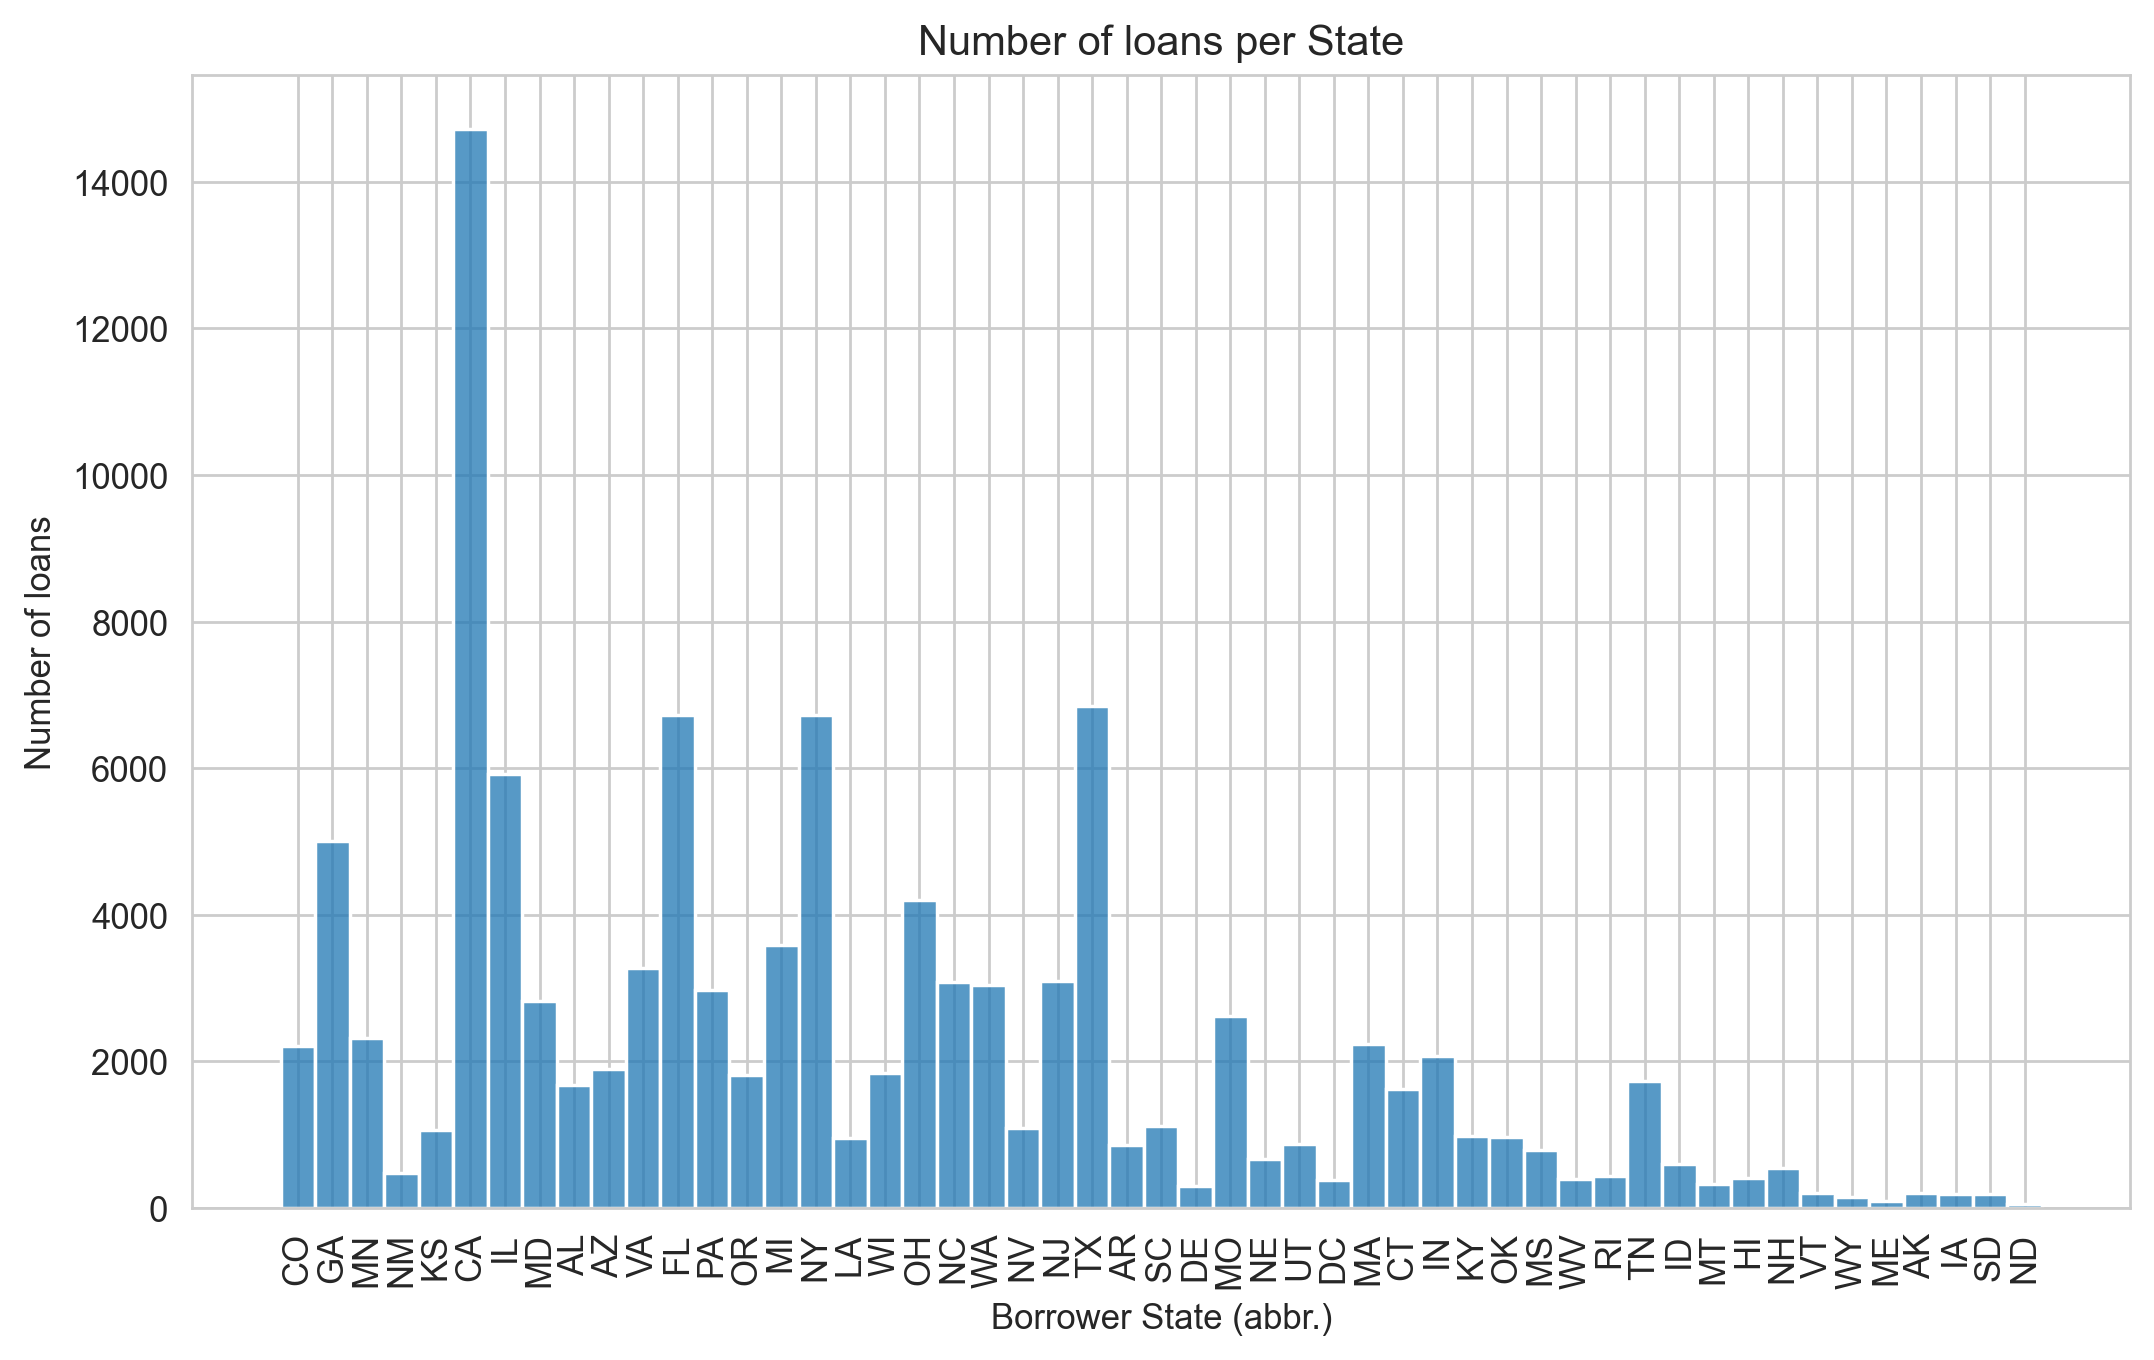

In [800]:
# let's get a look at the loan distribution by state
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6),dpi=250)
sns.histplot(data= loans, x = 'BorrowerState', ax = axes)
plt.xlabel('Borrower State (abbr.)')
plt.ylabel('Number of loans');
#rotate the ticks to avoid clutter
plt.xticks(rotation = 90);
plt.title('Number of loans per State');

Here we can see that a large majority of the loans taken out originate from California, followed by Texas, New York, and Florida. This will be useful information when we dig a little deeper later on.

Now I want to have a look at Home Ownership.

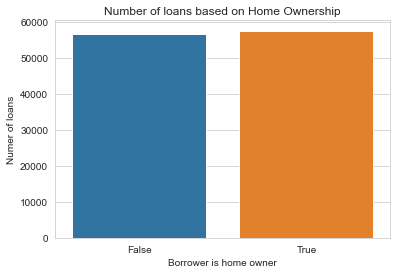

In [801]:
#This is a small visual, so no real need to set a subplot size.
sns.countplot(x='IsBorrowerHomeowner', data = loans);
plt.xlabel('Borrower is home owner');
plt.ylabel('Numer of loans');
plt.title('Number of loans based on Home Ownership');

Interesting! It seems that there is a very even split between borrowers who own their home (or are paying a mortgage) and those who do not, with a slight edge to the homeowners. 

Let's now have a look at the types of loans being taken out.

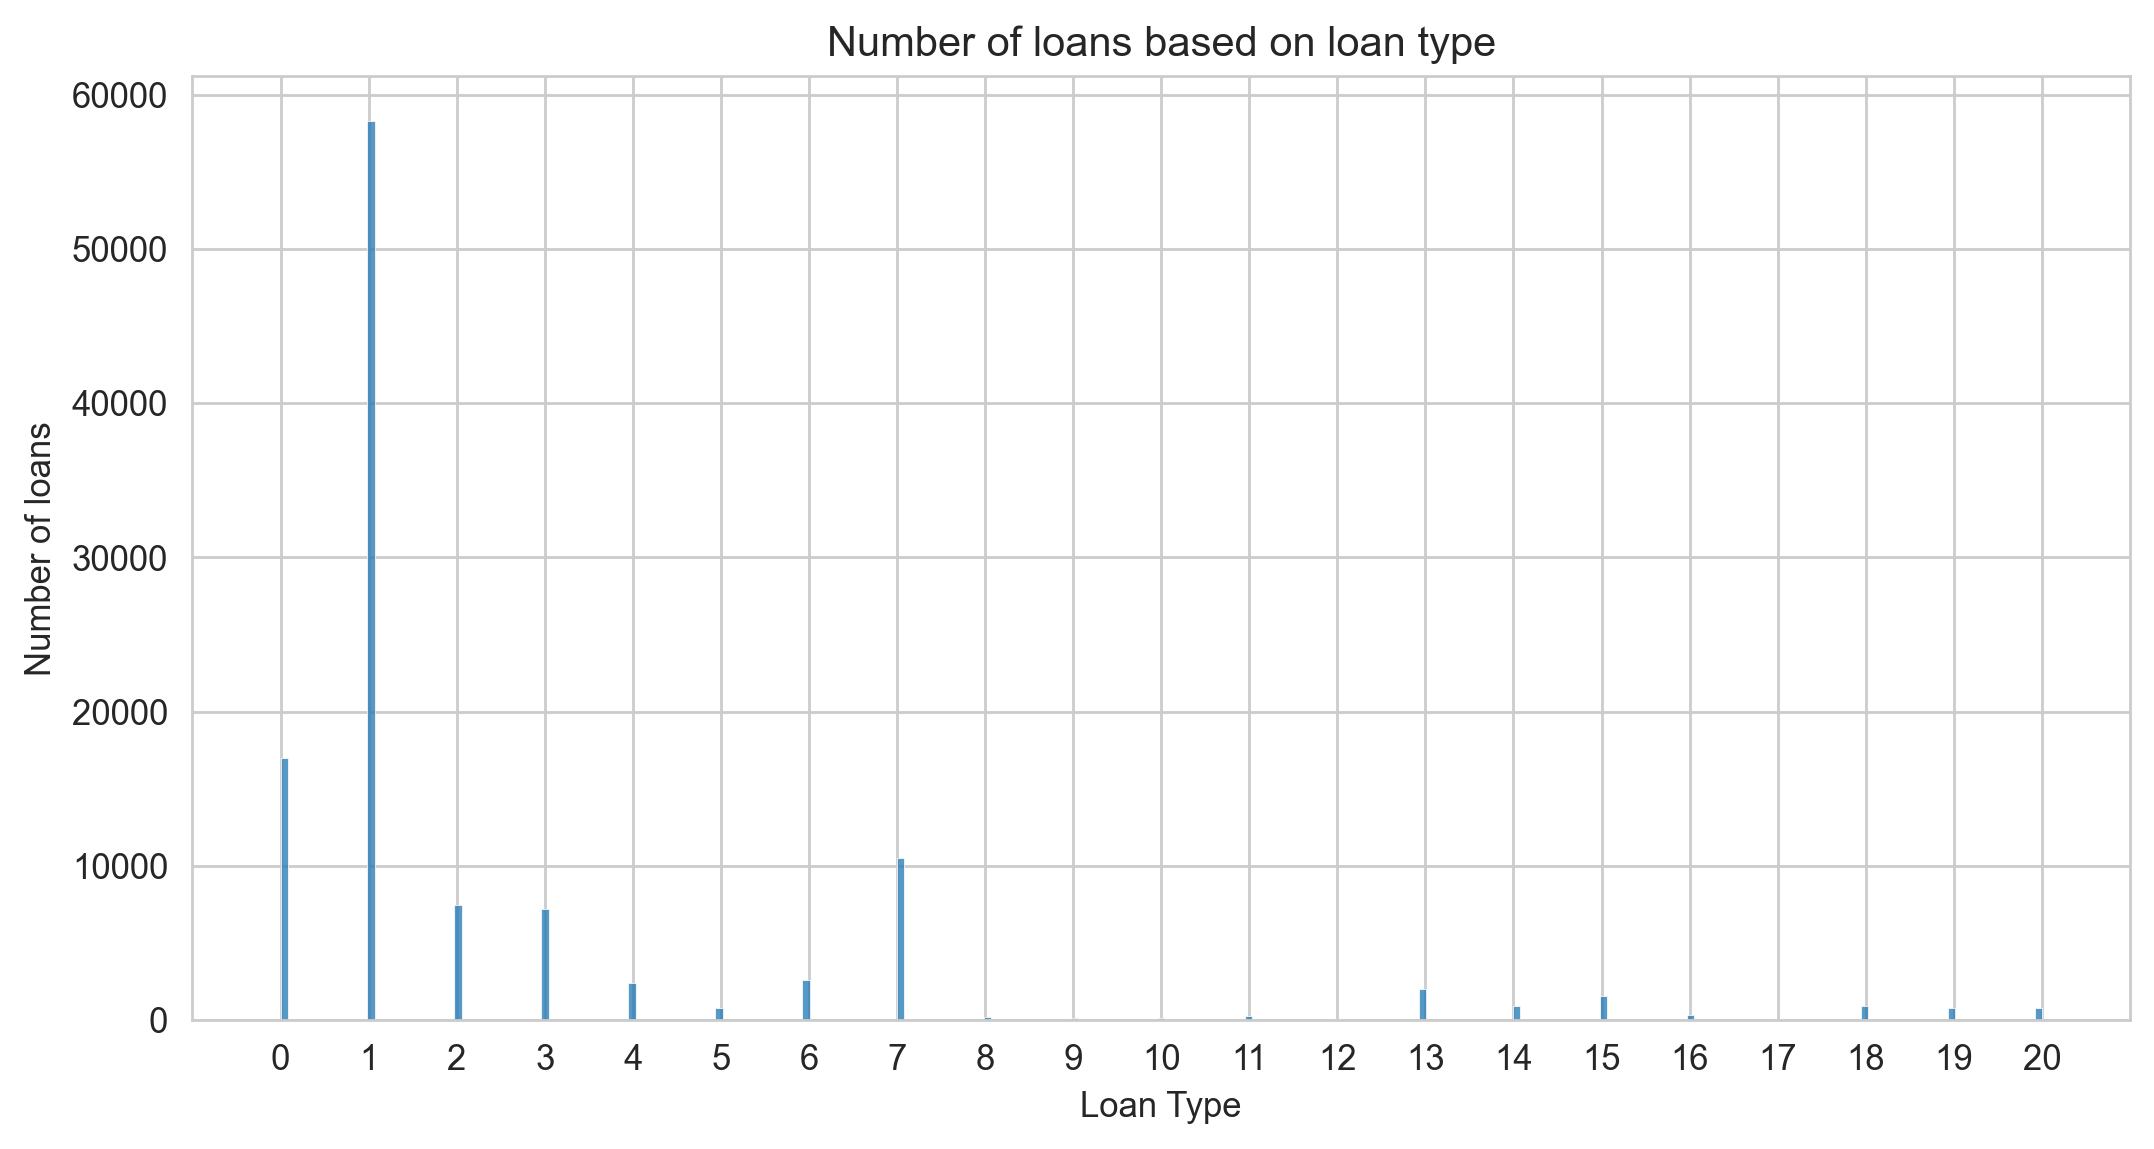

In [802]:
#More data in this graph, so I'll add a larger subplot for clarity
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
sns.histplot(data=loans['ListingCategory (numeric)'], ax=axes)
#there are only 20 units here, so I'll add the tick marks manually
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('Number of loans')
plt.xlabel('Loan Type');
plt.title('Number of loans based on loan type');

Above we can see a histogram showing the number of different loan types taken out. The categories of the loans in the dataset have been asigned a number (presumably to de-clutter the data). Here is the list of the categories and their corresponding number:
> **0** - Not Available, **1**- Debt Consolidation, **2**- Home Improvement, **3**- Business, **4**- Personal Loan, **5**- Student Use, **6**- Auto, **7**- Other, **8**- Baby & Adoption, **9**- Boat, **10**- Cosmetic Procedure, **11**- Engagement Ring, **12**- Green Loans, **13**- Household Expenses, **14**- Large Purchases, **15**- Medical/Dental, **16**- Motorcycle, **17**- RV, **18**- Taxes, **19**- Vacation, **20**- Wedding Loans

With this information, we can see that the vast majority of loans taken out are under category 1, 'Debt Consolidation', followed by both category 0, 'Not Available', and category 7, 'Other'. It will be interesting to dig deeper into these findings and find what relationships are shared between the previously explored variables.

But first, let's have a look at the status of these loans.

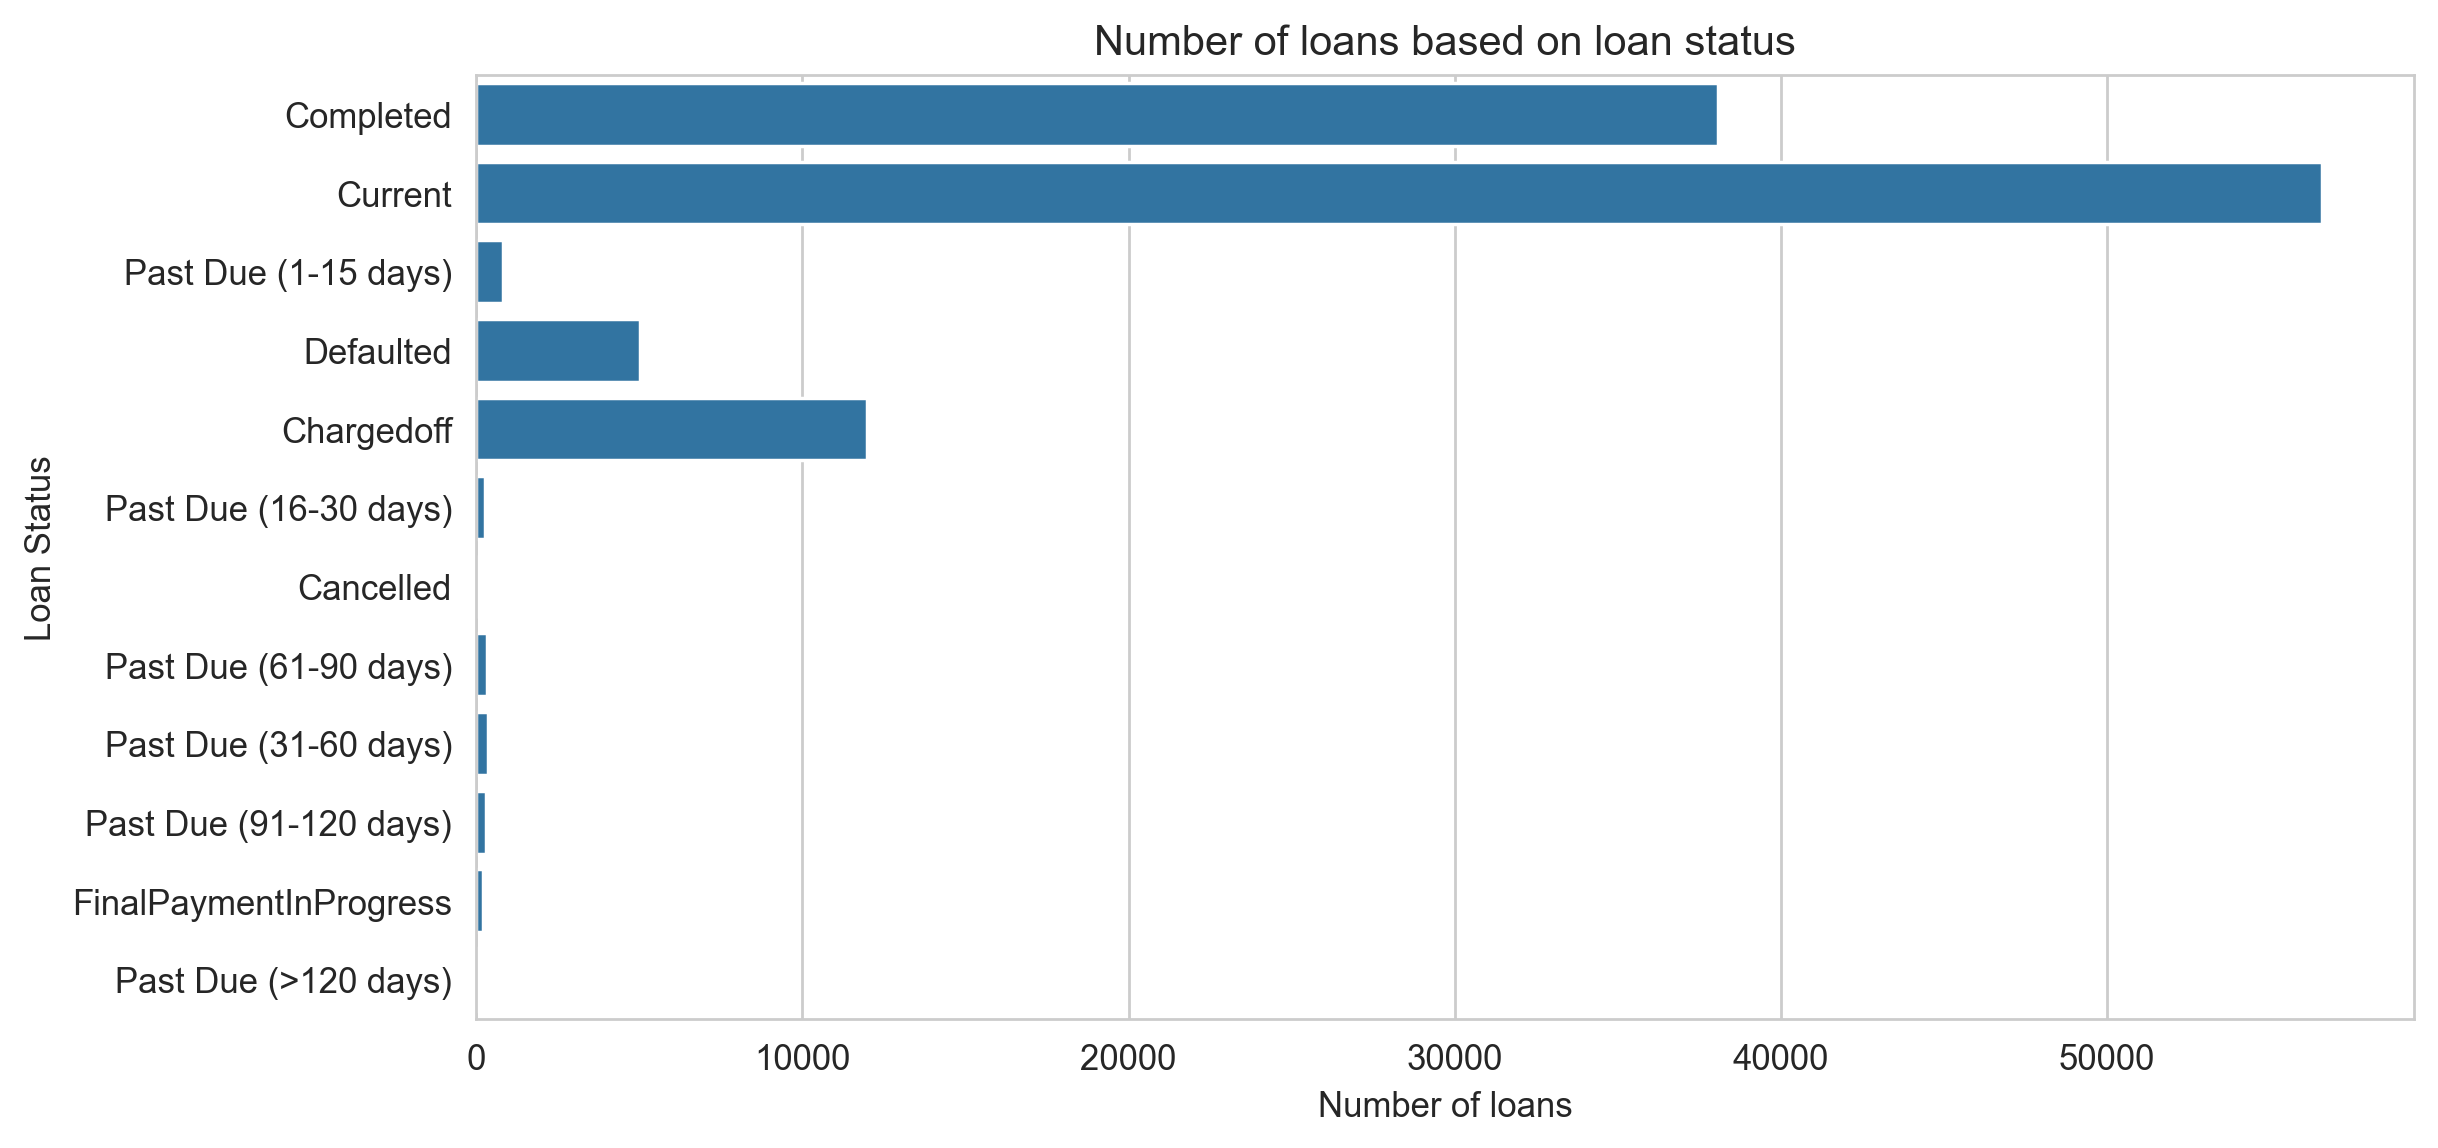

In [803]:
#let's set the size of our plot so that it is easily readable
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
#add a default color palette to avoid unnecessary color and confusion
default_color = sns.color_palette()[0]
sns.countplot(y='LoanStatus', data = loans, color = default_color );
plt.title('Number of loans based on loan status')
plt.xlabel('Number of loans')
plt.ylabel('Loan Status');

Ok. So we can see that the large bulk of loans in the dataset are still 'Current', with a large number of them being completed as well. I'm interested to know what types of loans make up the graph above, but first I want to explore the borrowers' employment status.


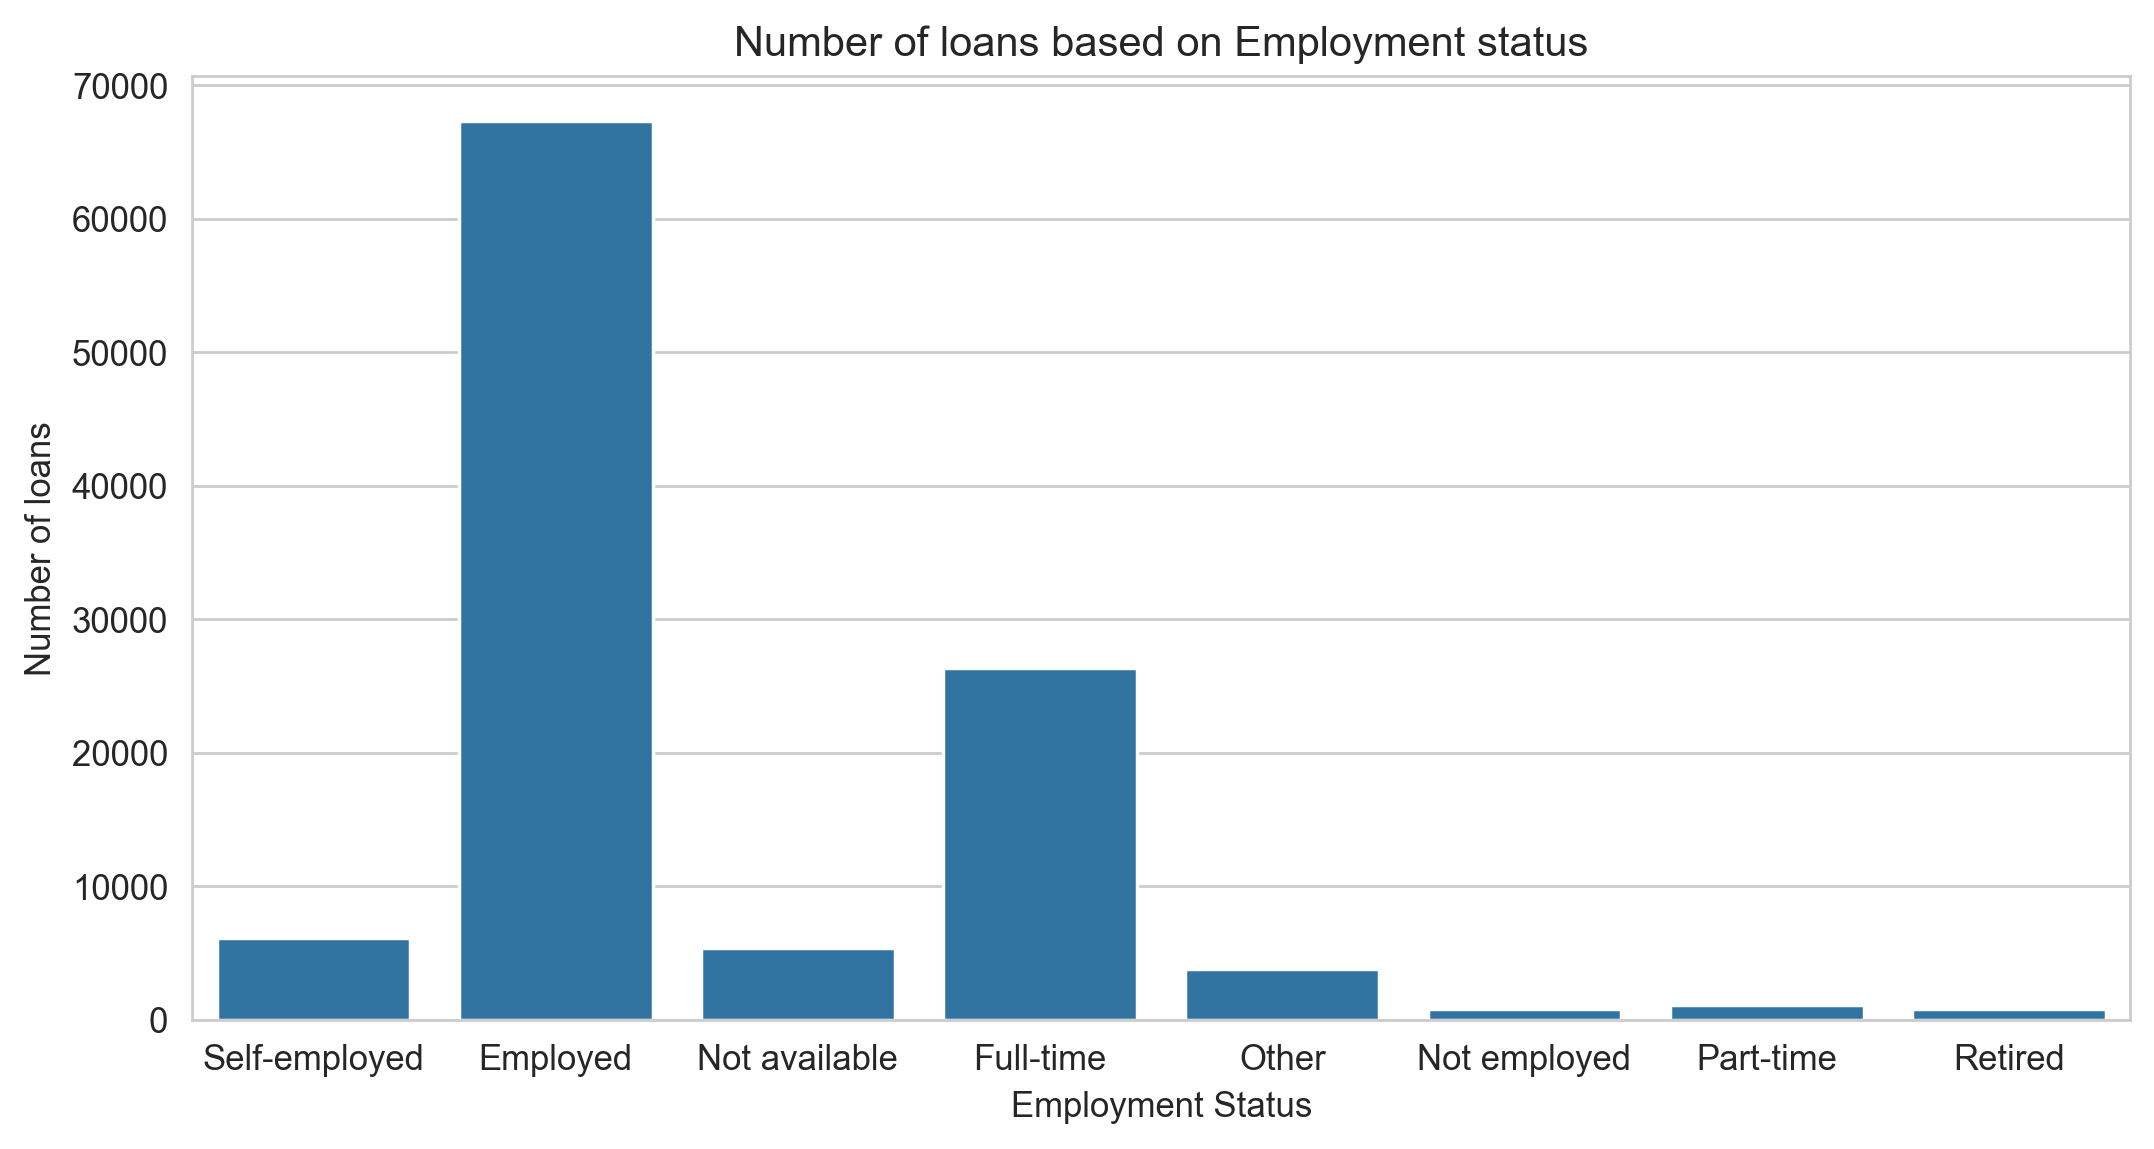

In [804]:
#add subplot for size and clarity, then plot with default color
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
default_color = sns.color_palette()[0]
sns.countplot(data = loans, x = 'EmploymentStatus', color = default_color);
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')
plt.title('Number of loans based on Employment status');

It looks like most of the borrowers, between 60k and 70k, are employed, with around 30k being employed full-time. This isn't any big revelation, but we can use this data for further analysis later on.

Now, let's have a comparative look at the average borrower APR and interest rates.

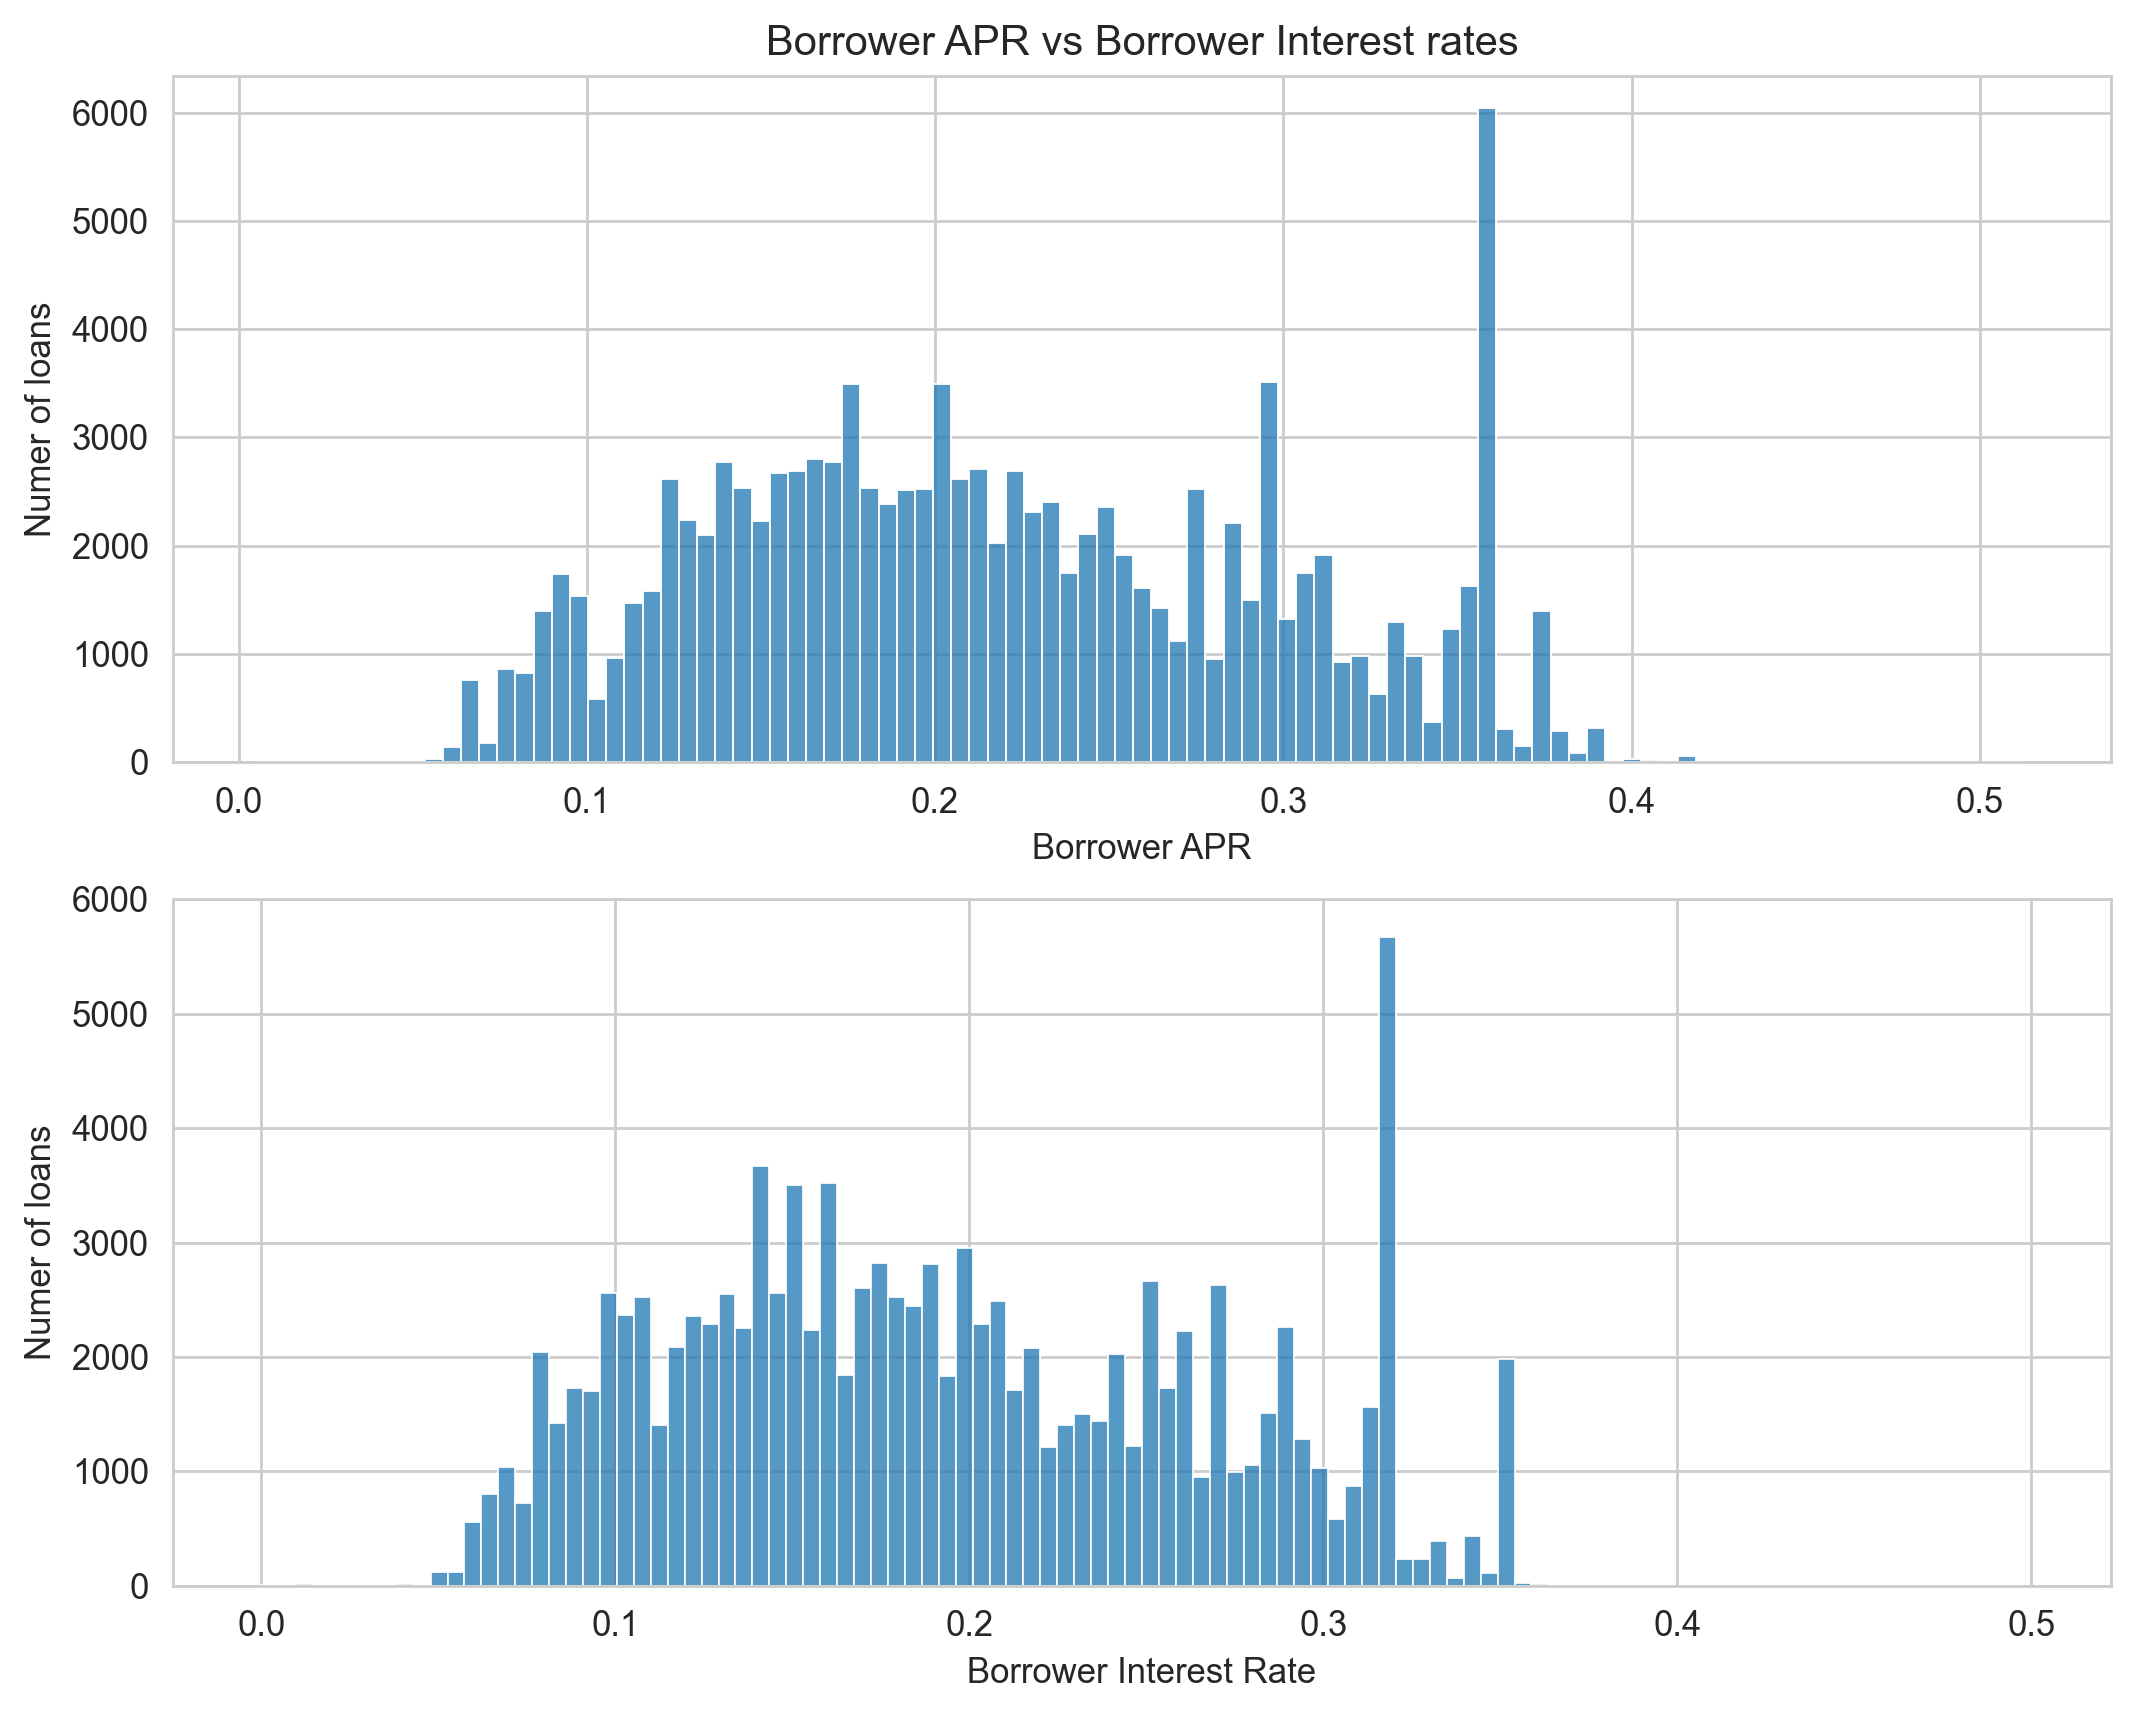

In [805]:
# create subplot with 2 rows to show both graphs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8),dpi=250)
sns.histplot(data=loans, x='BorrowerAPR', ax=axes[0])
sns.histplot(data=loans, x='BorrowerRate', ax=axes[1])
# set the x axis labels for each graph
axes[0].set_xlabel('Borrower APR')
axes[0].set_ylabel("Numer of loans")
axes[1].set_xlabel('Borrower Interest Rate')
axes[1].set_ylabel('Numer of loans')
# set a limit on the y axis so both graphs are scaled the same
plt.ylim(0,6000);
axes[0].set_title('Borrower APR vs Borrower Interest rates');

This looks good, but I think I would rather have the x axis reflect the true percentage amount as opposed to the fraction. I'll need to make this adjustment and re plot it.

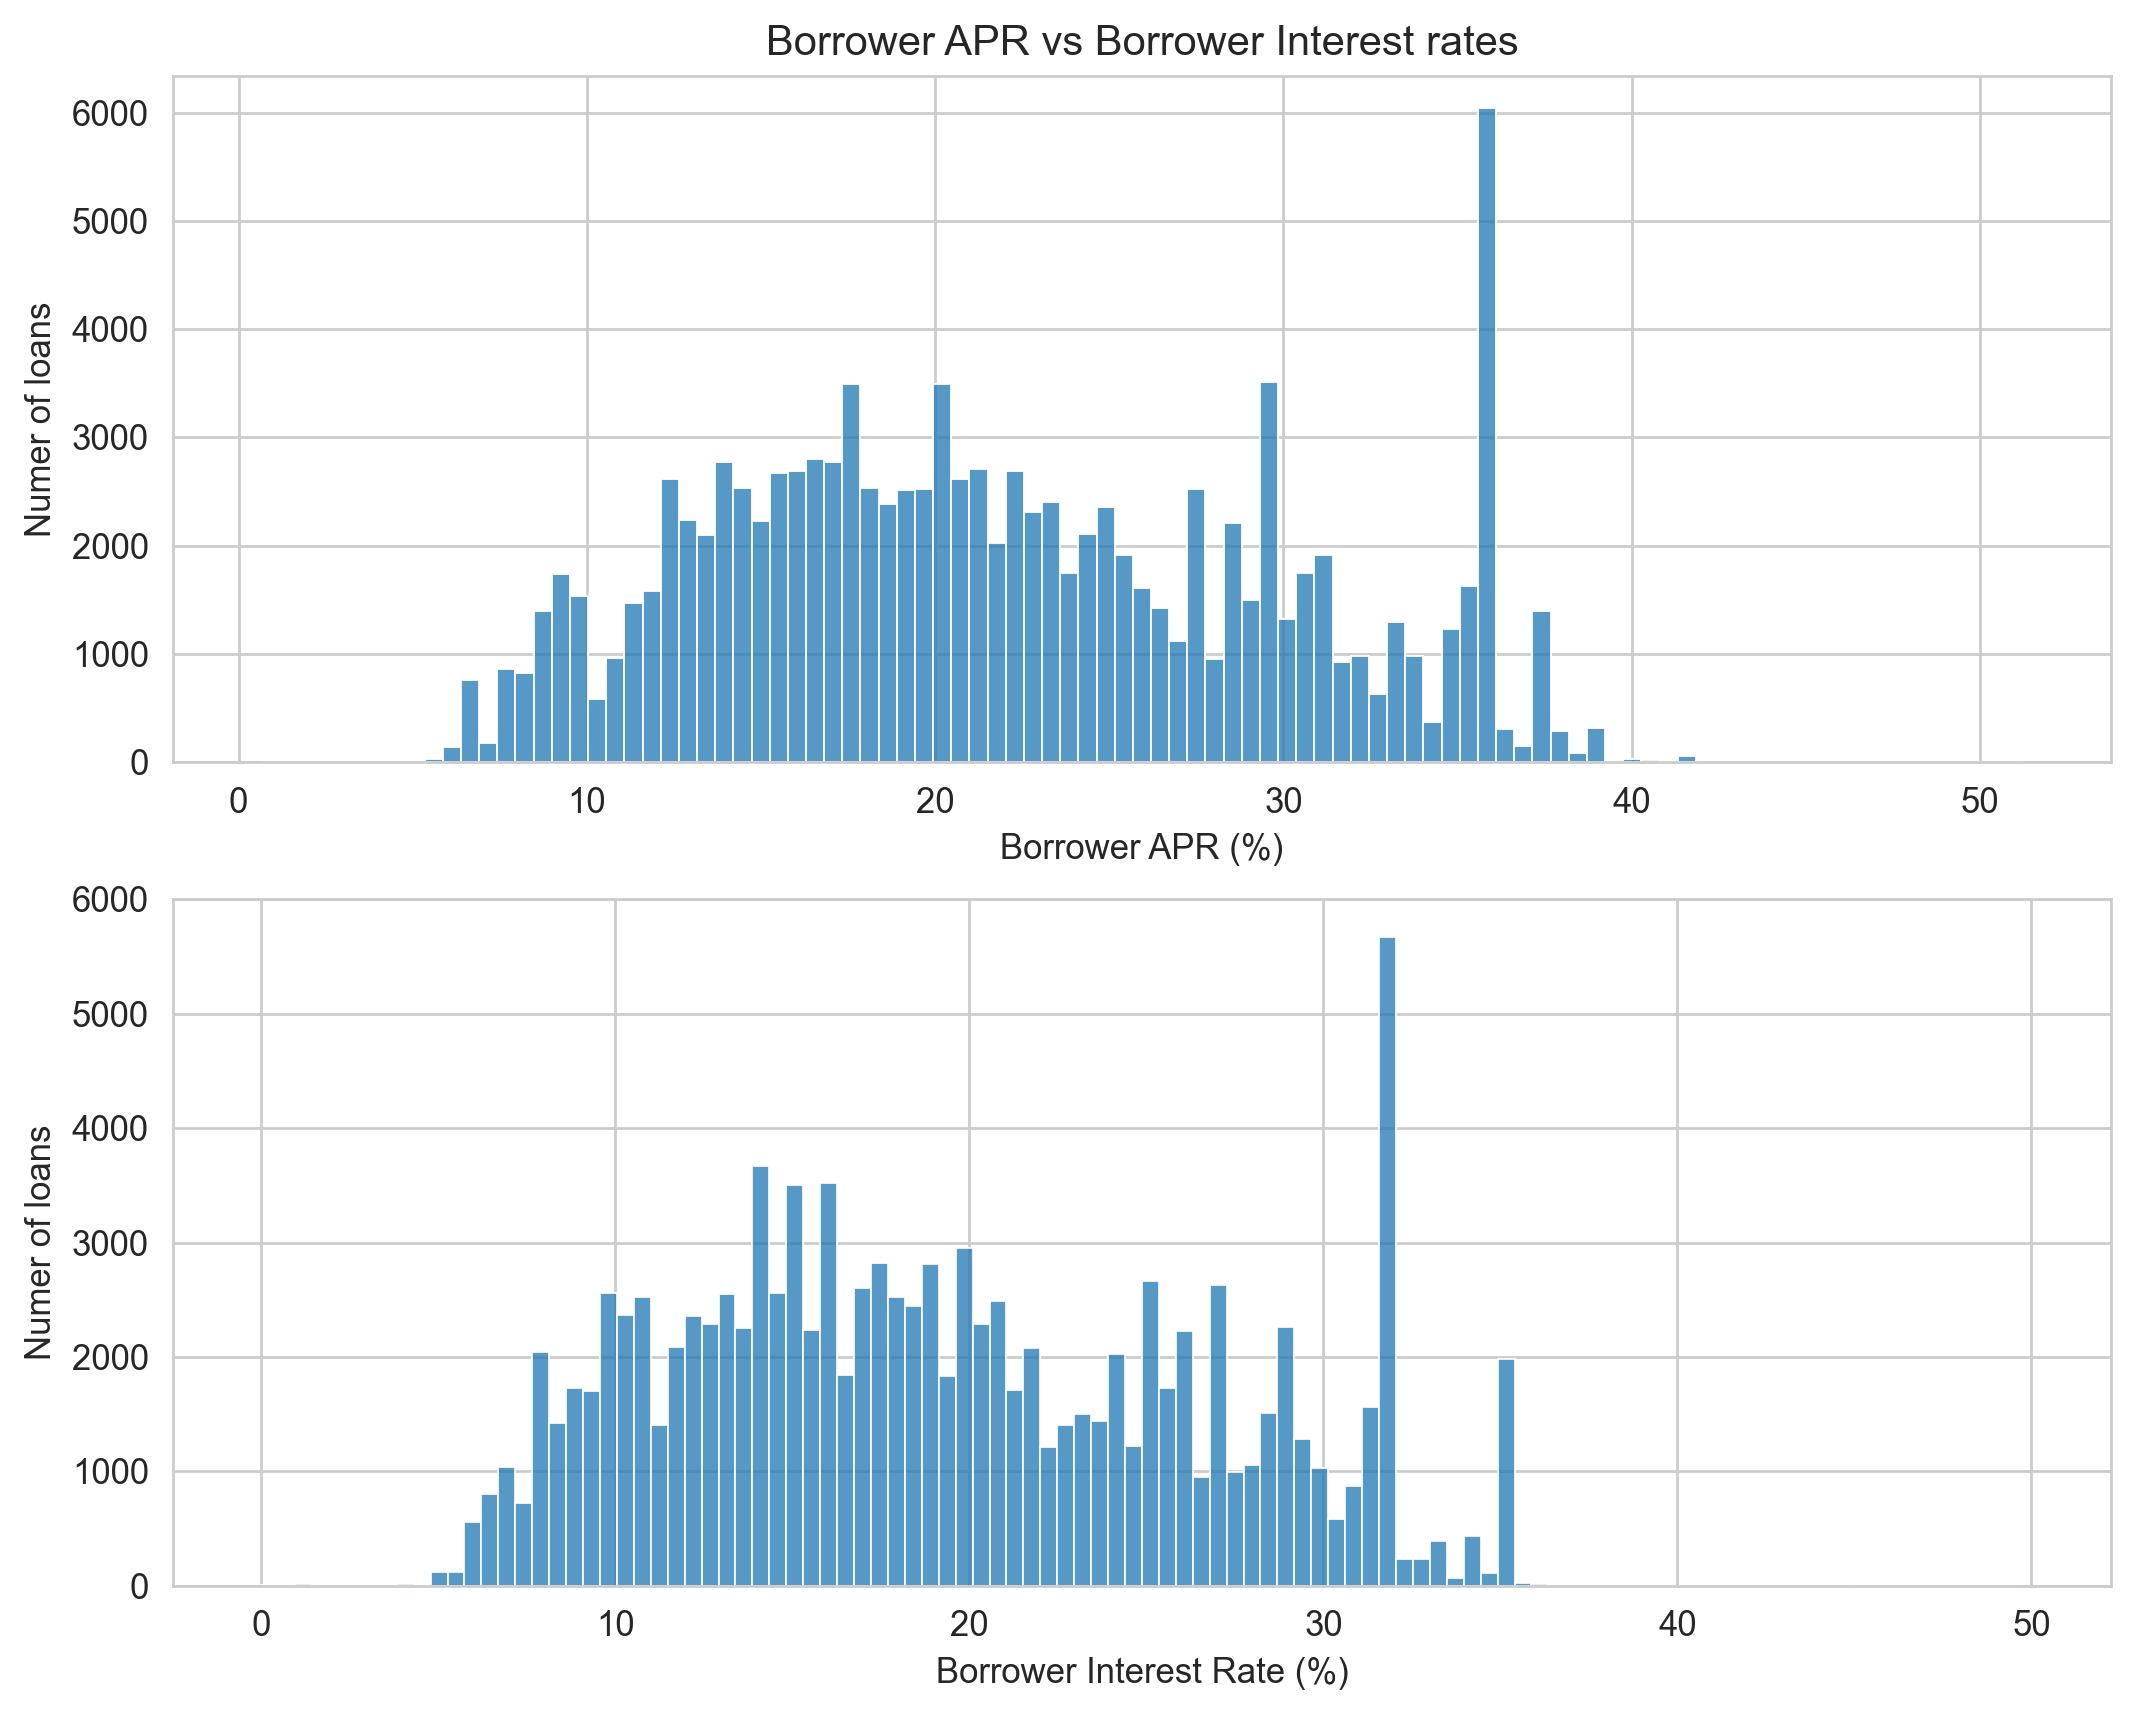

In [806]:
#create a new variable to represent the percentages by multiplying these columns by 100.
loans['borrower_perc'] = loans['BorrowerAPR']*100
loans['interest_perc'] = loans['BorrowerRate']*100
#replot the graph from above with the new variables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8),dpi=250)
sns.histplot(data=loans, x='borrower_perc', ax=axes[0])
sns.histplot(data=loans, x='interest_perc', ax=axes[1])
# set the x axis labels for each graph
axes[0].set_xlabel('Borrower APR (%)')
axes[0].set_ylabel("Numer of loans")
axes[1].set_xlabel('Borrower Interest Rate (%)')
axes[1].set_ylabel('Numer of loans')
# set a limit on the y axis so both graphs are scaled the same
plt.ylim(0,6000);
axes[0].set_title('Borrower APR vs Borrower Interest rates');

That's better. Now we can clearly see that both the borrower APR and borrower interest rates share a similar distribution, the APR graphic shows a spike around 36%, while the interest rate shows a spike around 32%. It also seems that there are a small number of loans who's APR sits above 40%, and an even smaller amount of loans who's interest rate sits around 45%. These could be interesting points to look at.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

The first varialbe I examined was the original loan amount. Once graphed, it showed a long tail as the range of numbers covered was quite large, so I transformed this data using a log transformation. After the log transformation, the data took on a somewhat bimodal distribution, with peaks around 4k, then smaller peaks at 10k and 15k. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

None of the distributions I found during my investigation struck me as unusual, but I was a bit surprised at the even number of borrowers who owned a home versus those who do not. 

One adjust I made was on the income range variable. In order to plot this in a cohesive and sensible order, I had to change the column to a categorical datatype. This allowed me to plot the data in the order of my choosing, leading to a much more decipherable graphic.

Next, I transformed the borrower APR and borrower rate variables from their decimal formats into the true representation of their percentage. I did this my multiplying these two columns by 100.

## Bivariate Exploration

The first thing I wanted to look at was the comparison of loan types to borrower employment status.

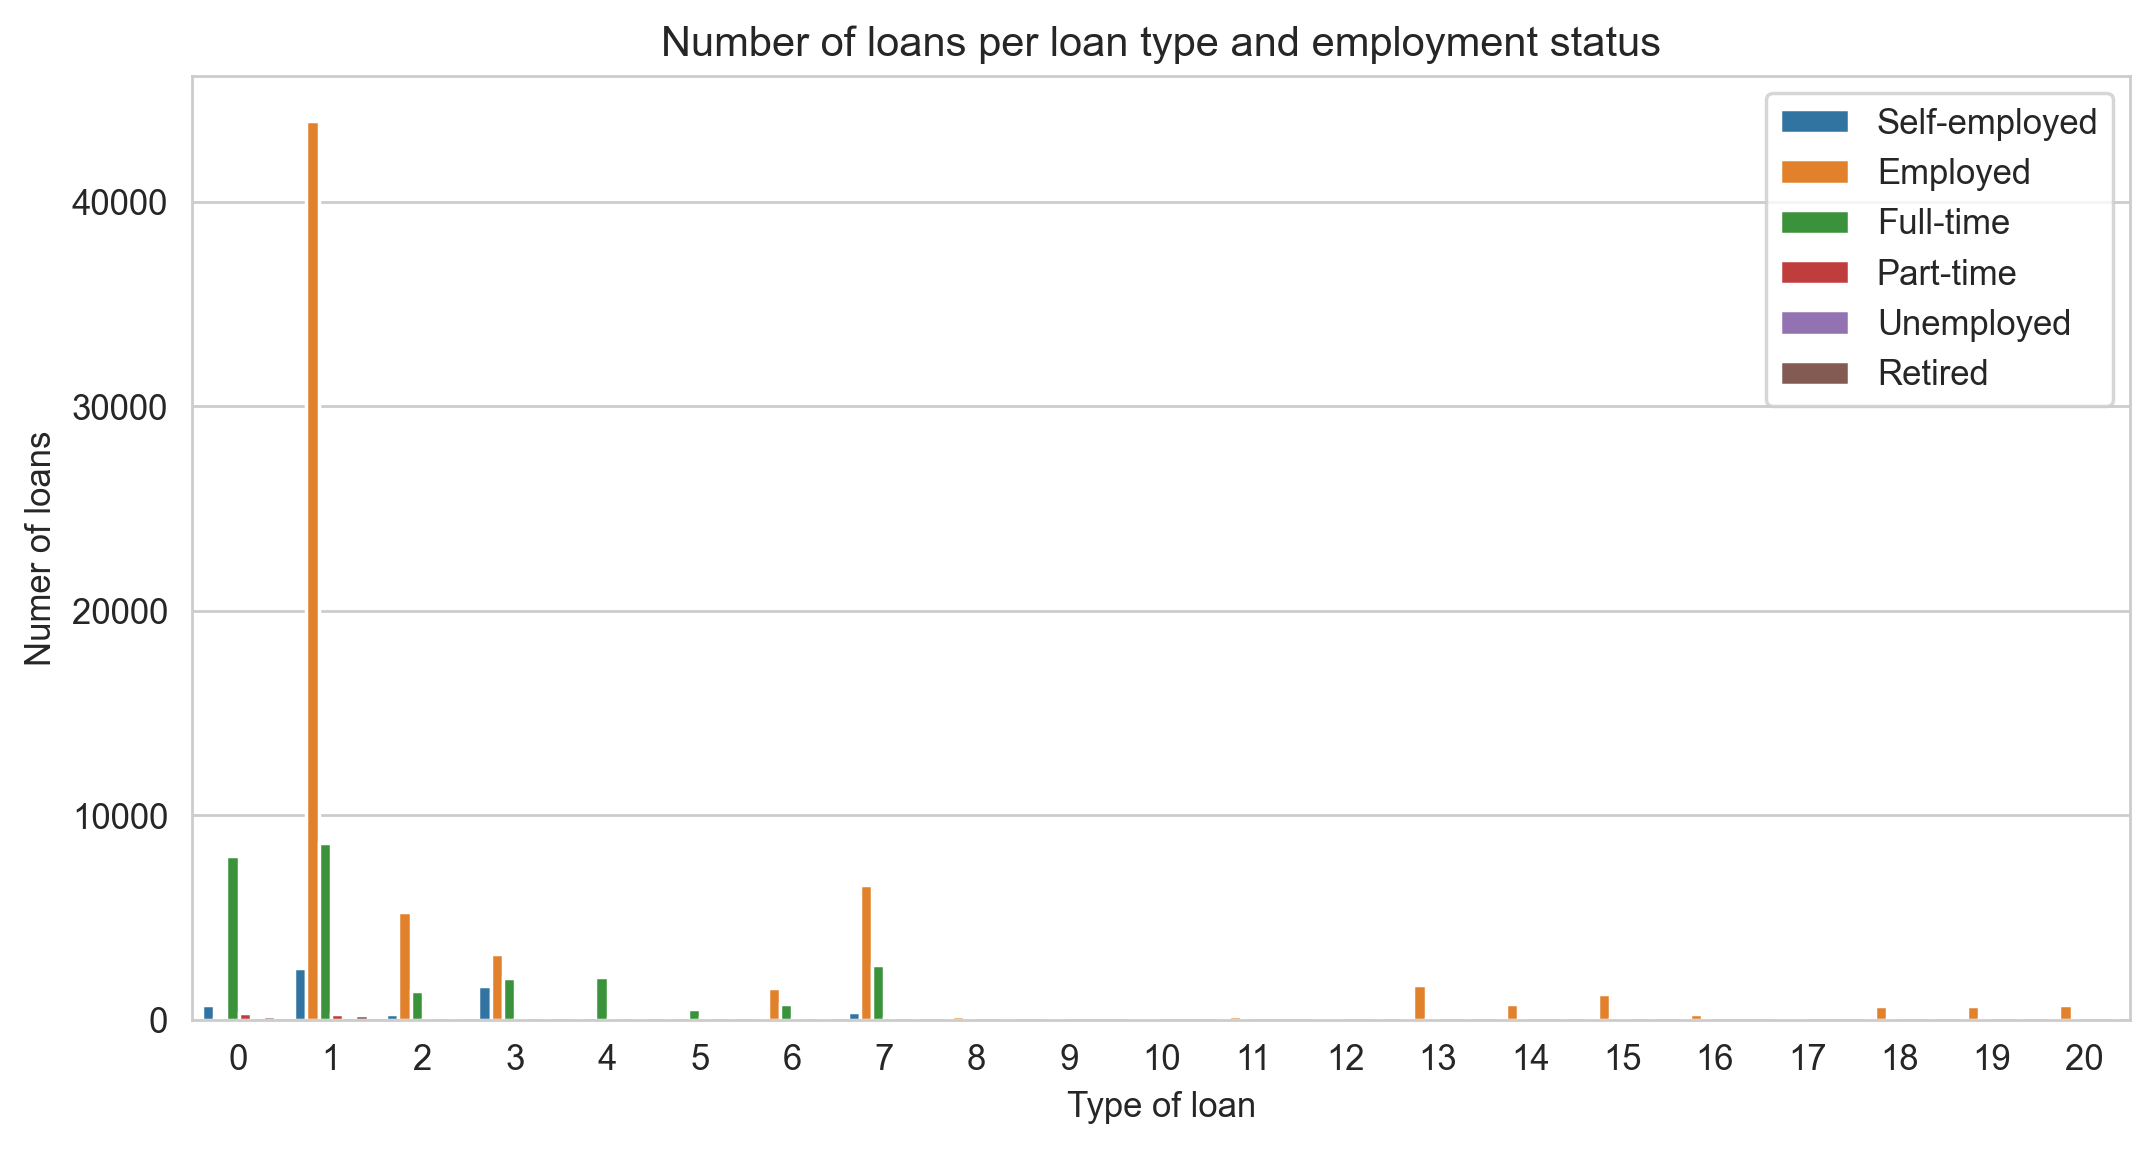

In [807]:
#Plotting the loan status against employment status.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),dpi=250)
#Filter the data with hue_order to look at the 5 most popular categories from the data above
sns.countplot(x='ListingCategory (numeric)', data = loans, hue = 'EmploymentStatus', hue_order = ['Self-employed','Employed','Full-time','Part-time','Unemployed','Retired'])
plt.legend(loc='upper right');
plt.xlabel('Type of loan');
plt.ylabel('Numer of loans')
plt.title('Number of loans per loan type and employment status');

It looks like the bulk of the current loans are from the 'debt consolidation' category (which makes sense with the numbers we saw above in the 'Loan Type' graph) and are mostly taken out by 'employed' borrowers. It also appears that most of the loands taken out by self employed borrowers are split between debt consolidation and business loans, the latter making sense for the self-employed.

From this data, it doesn't look like there are many loans granted to part-time, retired, or unemployed applicants.

Next, let's have a look at the comparison between APR and interest rates.

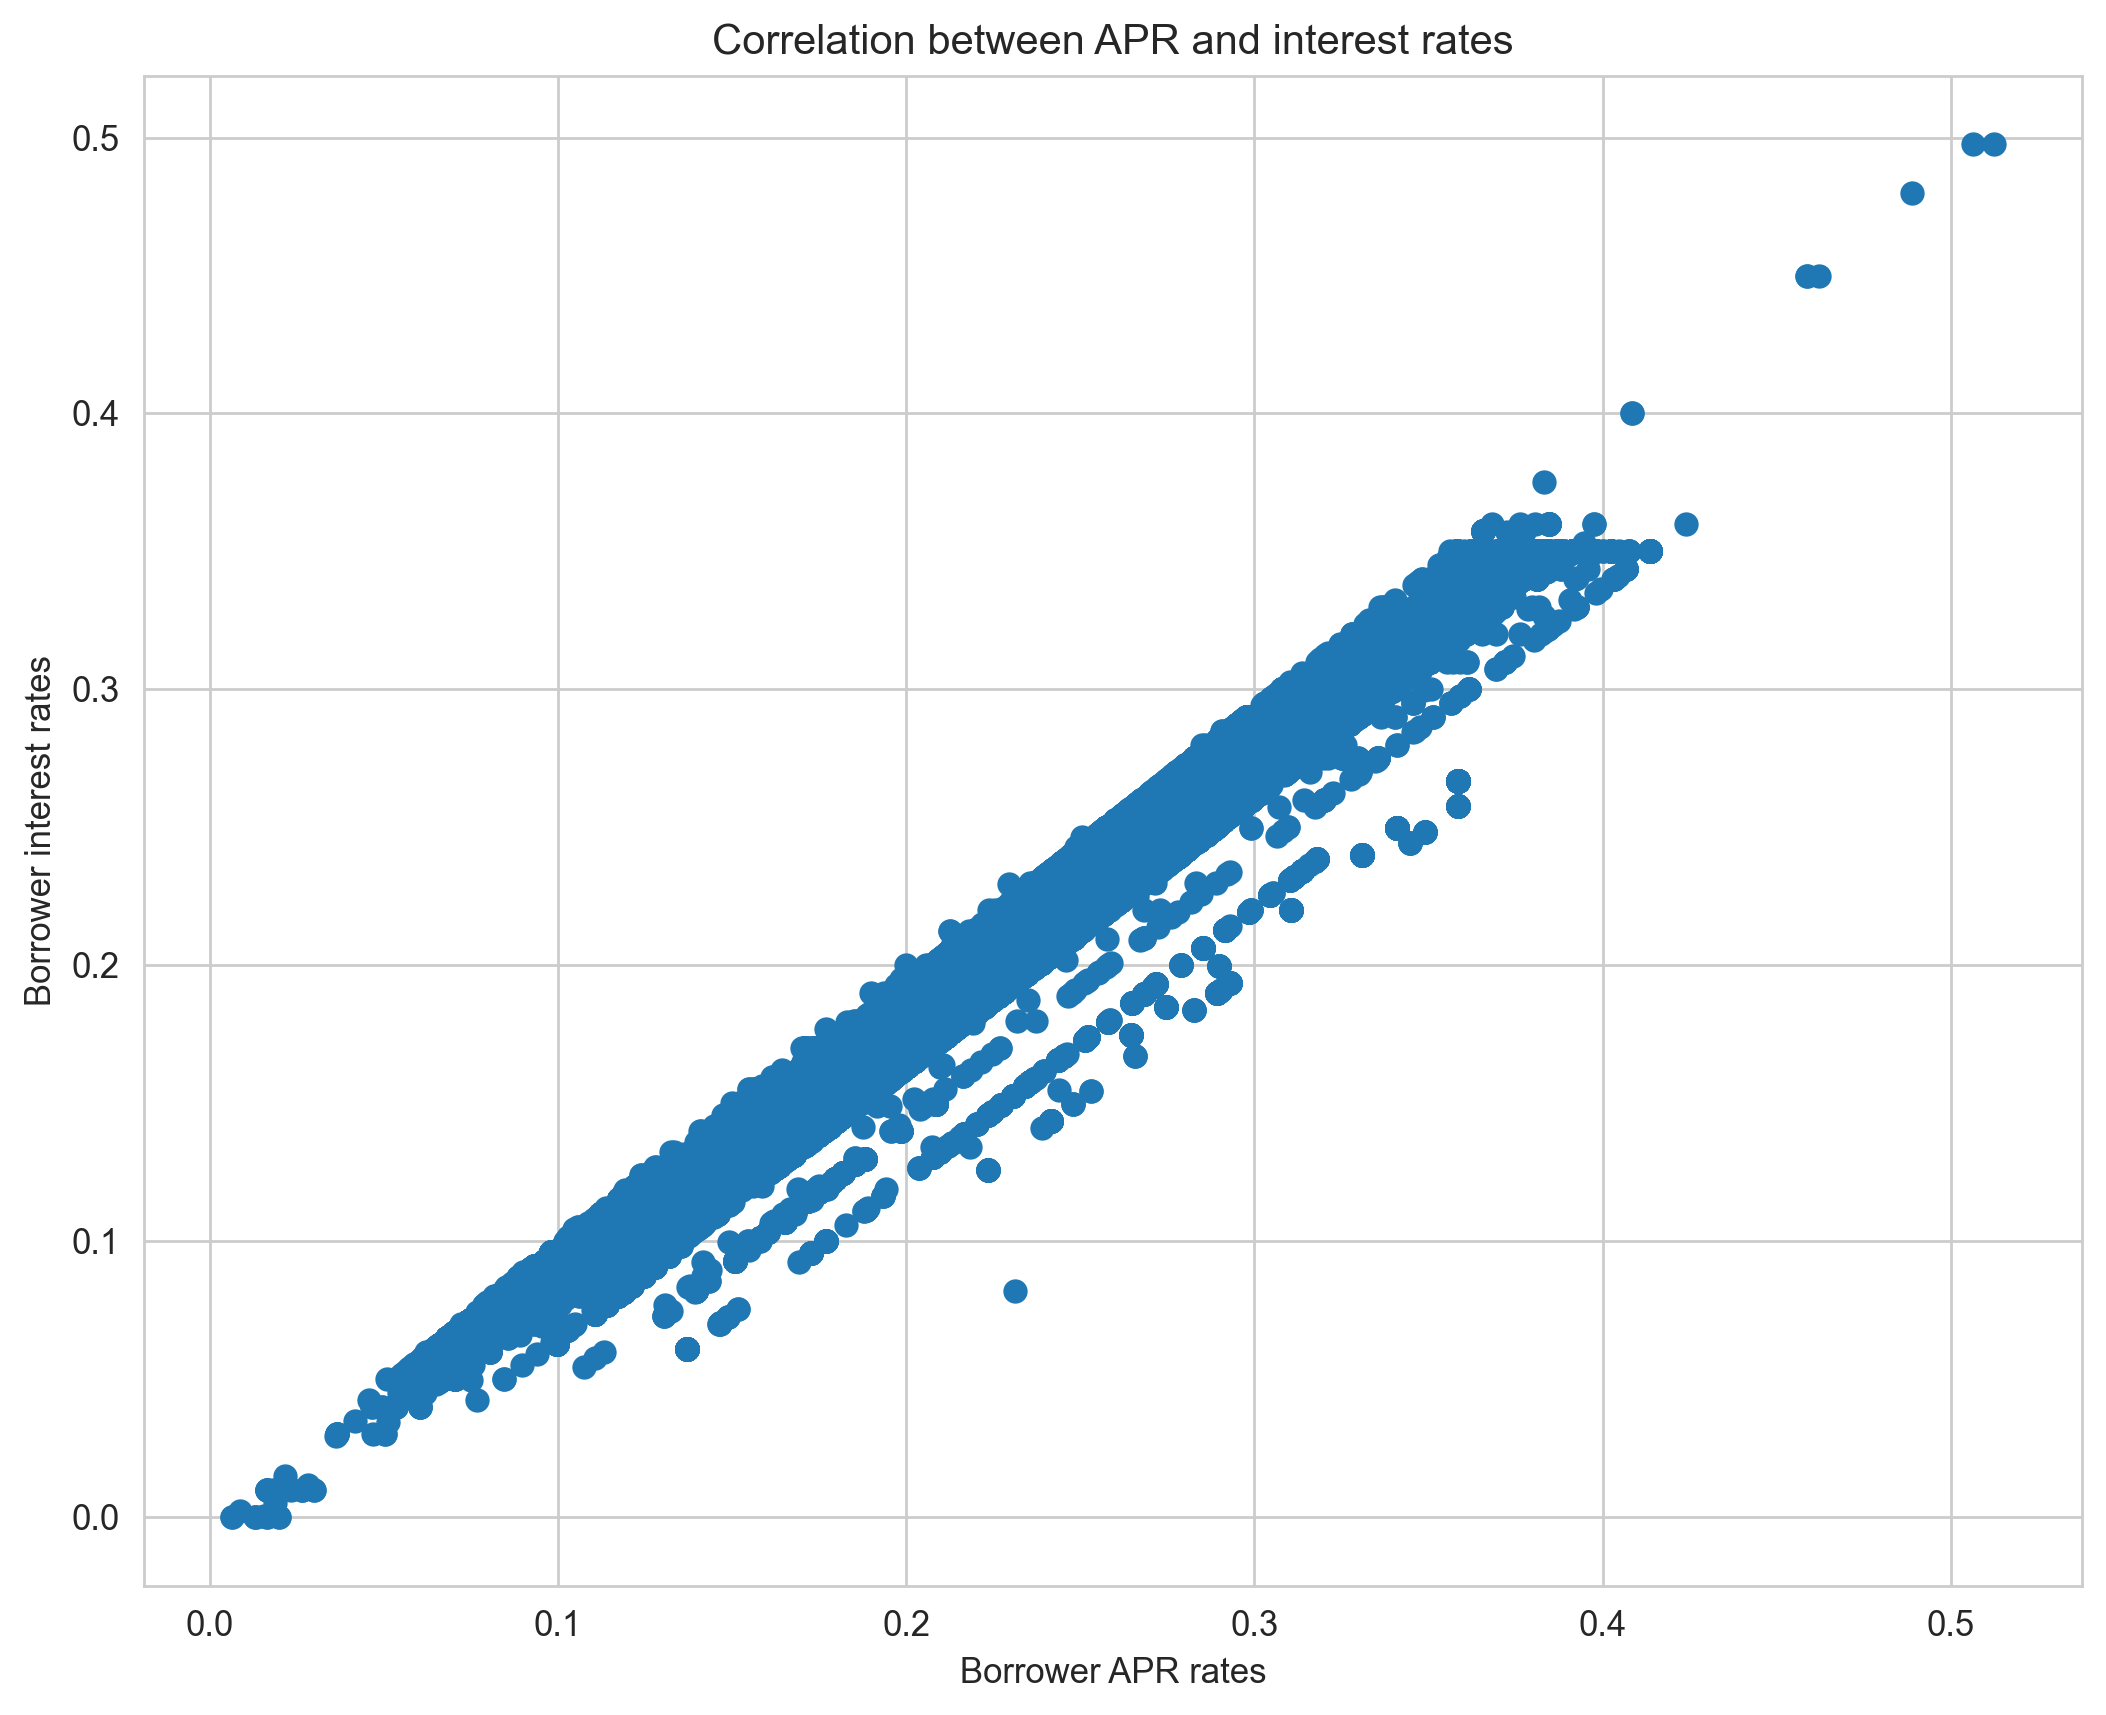

In [808]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
plt.scatter(data=loans, x='BorrowerAPR', y='BorrowerRate');
plt.xlabel('Borrower APR rates')
plt.ylabel('Borrower interest rates')
plt.title('Correlation between APR and interest rates');

We can clearly see a positive correlation between the interest rates and the APR rates here, but what about the relationship between interest rates and loan amounts?



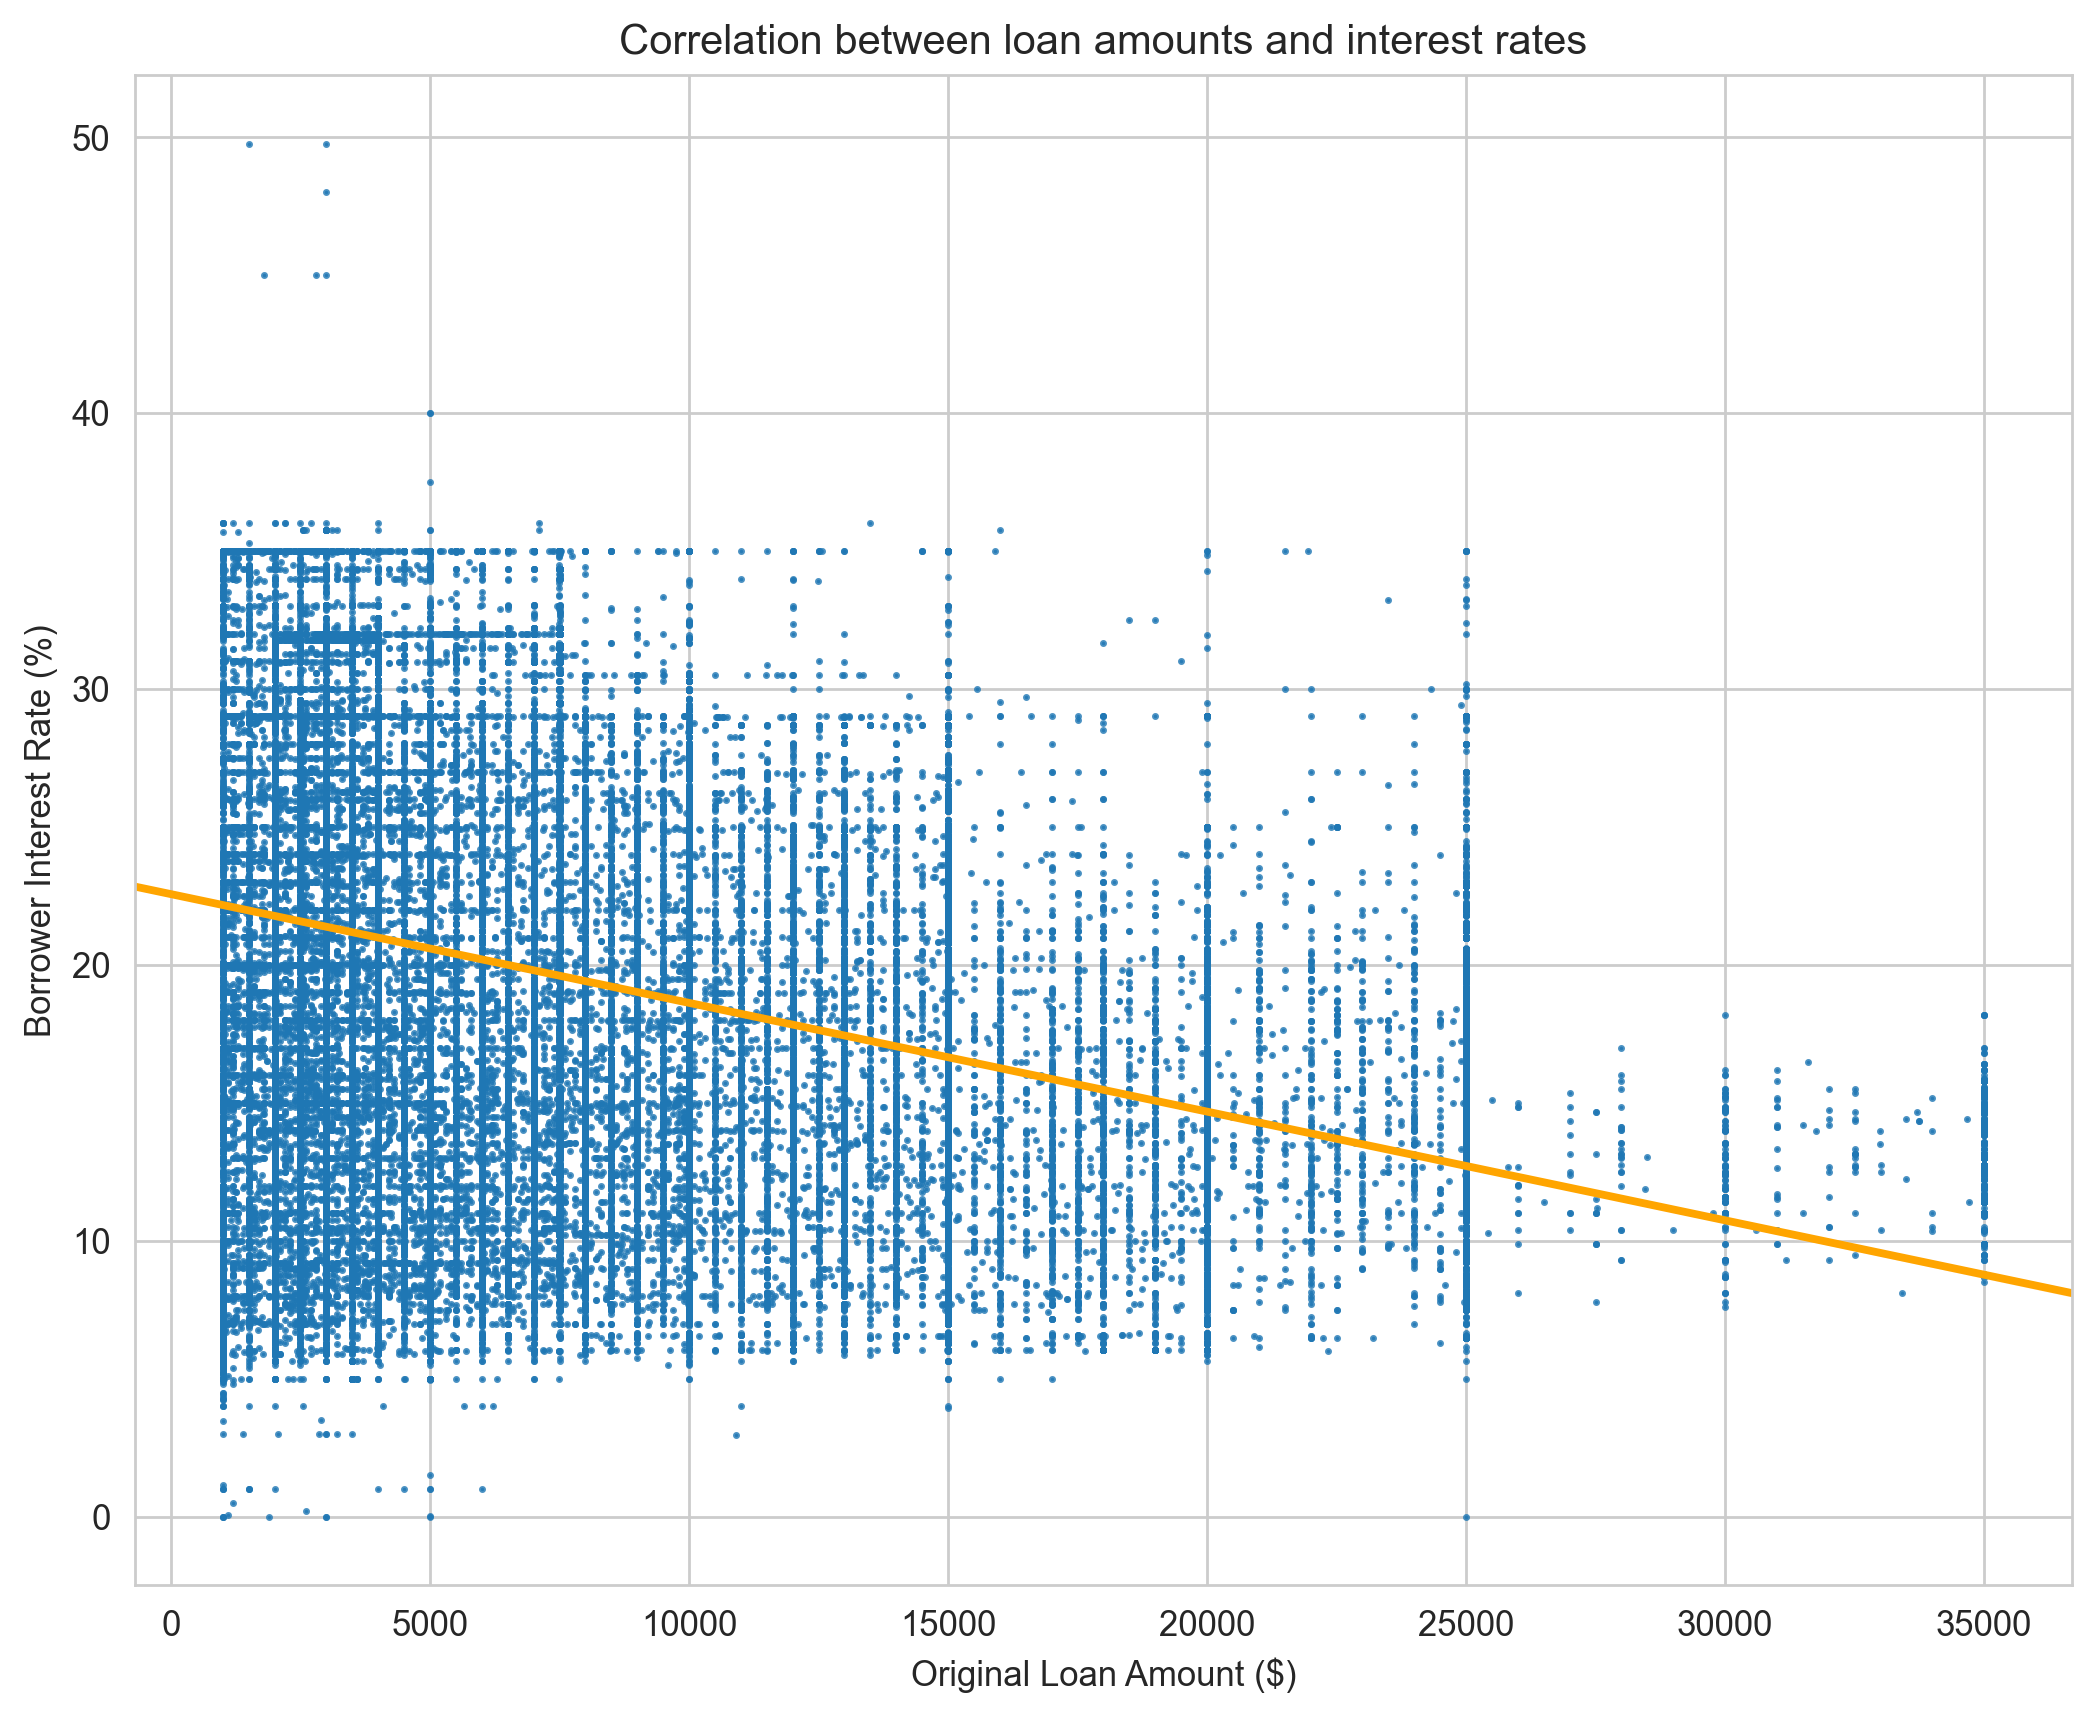

In [809]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
#plot a scatter plot with a trend line to show correlation. Adjust jitter and transparency of points for more clarity.
sns.regplot(data=loans, x='LoanOriginalAmount', y='interest_perc', truncate=False,x_jitter = 0.3, scatter_kws={'s':1}, line_kws={'color':'orange'} )
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Borrower Interest Rate (%)');
plt.title('Correlation between loan amounts and interest rates');




Here we do see a negative correlation between loan amounts and interest rates in that the higher the loan amount, the better chance there is of having a lower interest rate as well. It is also worth noting that, after a loan amount of about 5000, we never see interest rates rise above 40%.

In an attempt to see what else may have an effect on interest rates, I want to explore other relationships.
Let's see how the type of loan is related to interest rates.

In [810]:
#I want to create a function to use for plotting box plots to avoid redundant code.
def myBoxPlot(df, xVar , yVar, hue=None, color = 0, palette=None, order=None, hue_order=None, title=''):
    #creating placeholder variables for the x and y values so I can use this function to plot future boxplots
    plt.figure(figsize=[14,6])
    sns.boxplot(data=df, x=xVar, y=yVar, hue=hue, color=sns.color_palette()[color], palette=palette, order=order,hue_order=hue_order);
    #clean up variable names for clarity
    xVar=xVar.replace('_'," ")
    yVar= yVar.replace('_'," ")
    if hue:
        hue=hue.replace("_"," ")
    #add title, x, and y labels    
    plt.title(f'''Distribution of {xVar} by {yVar} {'and' if hue else ''} {hue if hue else ''}{title}'''.title(), fontsize = 14, weight = "bold")
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel(yVar.title(), fontsize = 10, weight = 'bold')

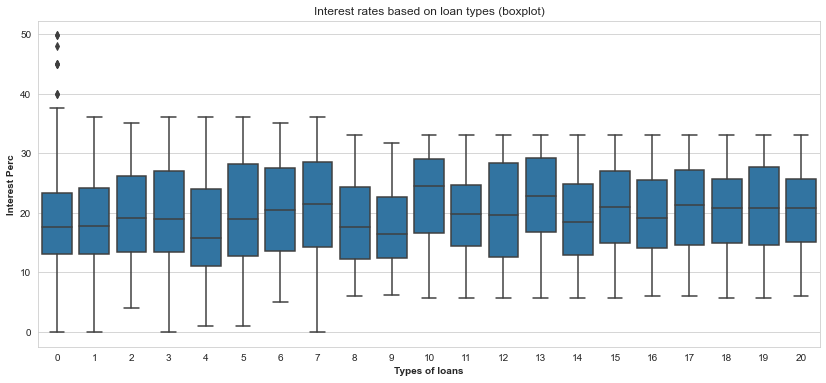

In [811]:
myBoxPlot(loans, 'ListingCategory (numeric)','interest_perc')
plt.xlabel('Types of loans');
plt.title('Interest rates based on loan types (boxplot)');

So here we can see that the type of loan does factor in to the interest rate applied. This graph looks a little cluttered so I want to have a look at the 5 most popular loan types. It is worth noting before moving on that only one type of loan exceeds 40% interest, with outliers as high as 50%. Unfortunately, these loans fall under the 'Not Available' category, so the nature of these loans will remain a mystery. Another stand out here is the loan type 10 (Cosmetic Procedure) has a much higher median interest rate when compared to all of the other loan types, sitting at about 25%. 

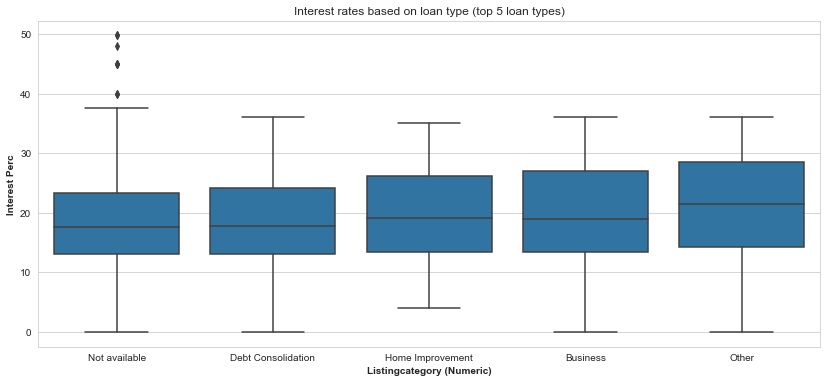

In [812]:
#create a new variable that includes only the top 5 loan types
top_loans = loans[(loans['ListingCategory (numeric)']==0) | (loans['ListingCategory (numeric)']==1) | (loans['ListingCategory (numeric)']==2) | (loans['ListingCategory (numeric)'] == 3) | (loans['ListingCategory (numeric)'] == 7)]
#use my previously created function to call a boxplot
myBoxPlot(top_loans, 'ListingCategory (numeric)', 'interest_perc');
my_labels = ['Not available','Debt Consolidation','Home Improvement','Business','Other']
plt.xticks(ticks=[0,1,2,3,4],labels = my_labels);
plt.title('Interest rates based on loan type (top 5 loan types)');

Zooming in on the most popular loan types we can see that they are all fairly similar, with a median interest rate hovering around 20% and their interquartile ranges sitting between roughly 15%-25%. These loan types all share a pretty similar max range as well, sitting around 35%-38%. 

It seems that, while loan types have some effect on the interest rates, I'm curious to see if there isn't another factor that has a much more noticeable effect.

Let's have a look at how employment status impacts a borrower's interest rates.

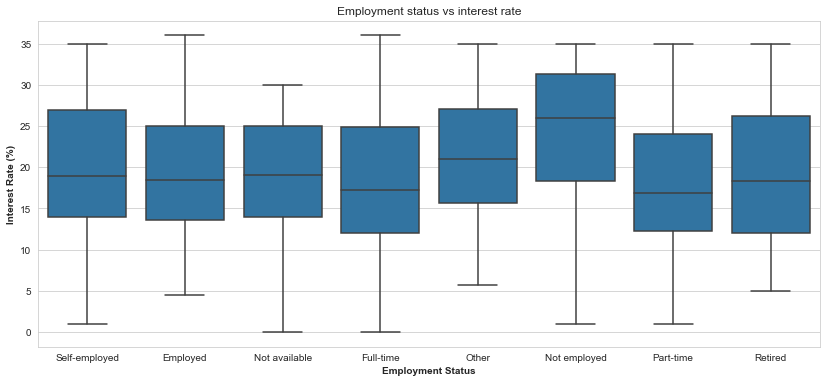

In [813]:
myBoxPlot(loans, 'EmploymentStatus', 'interest_perc')
plt.title('Employment status vs interest rate');
plt.xlabel('Employment Status')
plt.ylabel('Interest Rate (%)');


I'm not surprised to see here that borrowers who are listed as 'Not employed' have, on average, a much higher interest rate when compared to those who are employed in some facet (or even retired). It looks like the median interest rate for borrowers who are not employed sits around 26%-27%, while the median for most other employment statuses sit between 15%-20%. We can also see, however, that the max interest rate for the 'Not employed' category is smaller than that of the 'Full-time' category, so clearly there are other factors at play when it comes to deciding on interest rates.

Let's see if home ownership is a factor.

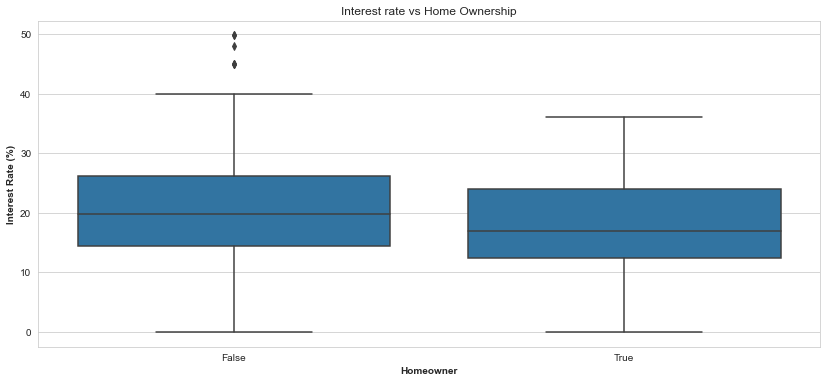

In [814]:
myBoxPlot(loans, 'IsBorrowerHomeowner', 'interest_perc');
plt.title('Interest rate vs Home Ownership')
plt.xlabel('Homeowner')
plt.ylabel('Interest Rate (%)');

So it does seem that owning a home have a positive impact when relating to interest rates. We can see with this information that homeonwers enjoy a median interest rate of about 18%, while those who rent or otherwise see a median interest rate of 20%. Homeowners also see a smaller maximum interest rate, as well as a lower inter quartile rate.

Out of curiosity, I want to see if the borrower's state has any impact on the interest rate.

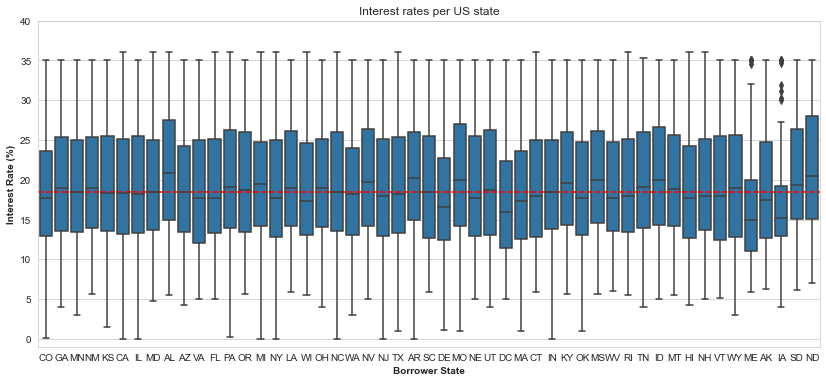

In [815]:
myBoxPlot(loans, 'BorrowerState', 'interest_perc')
plt.xlabel('Borrower State')
plt.ylabel('Interest Rate (%)');
int_med = np.median(loans['interest_perc'])
plt.axhline(y=int_med, color='r', linestyle='--')
plt.ylim(-1,40);
plt.title('Interest rates per US state');

Here we can quickly see that, while most states share a similar interquartile range, there are a couple states that stand out. It looks like Alabama (AL), on average, issues loans with higher interest rates, with a median rate just above 20%. I've added a dotted red line to represent the overall median across all states for more clarity. Another two states that jump out are Maine (ME) and Iowa (IA). Both of these states have much lower average interest rates, but are the only states with outliers, reaching up to 35%. 

Referring back to a previous graphic which indicated that California held many more loans than any other state, I want to have a closer look at this state in particular.

Firstly, I want to know how many borrowers in California are homeowners, and I want to know what types of loans they are taking out.

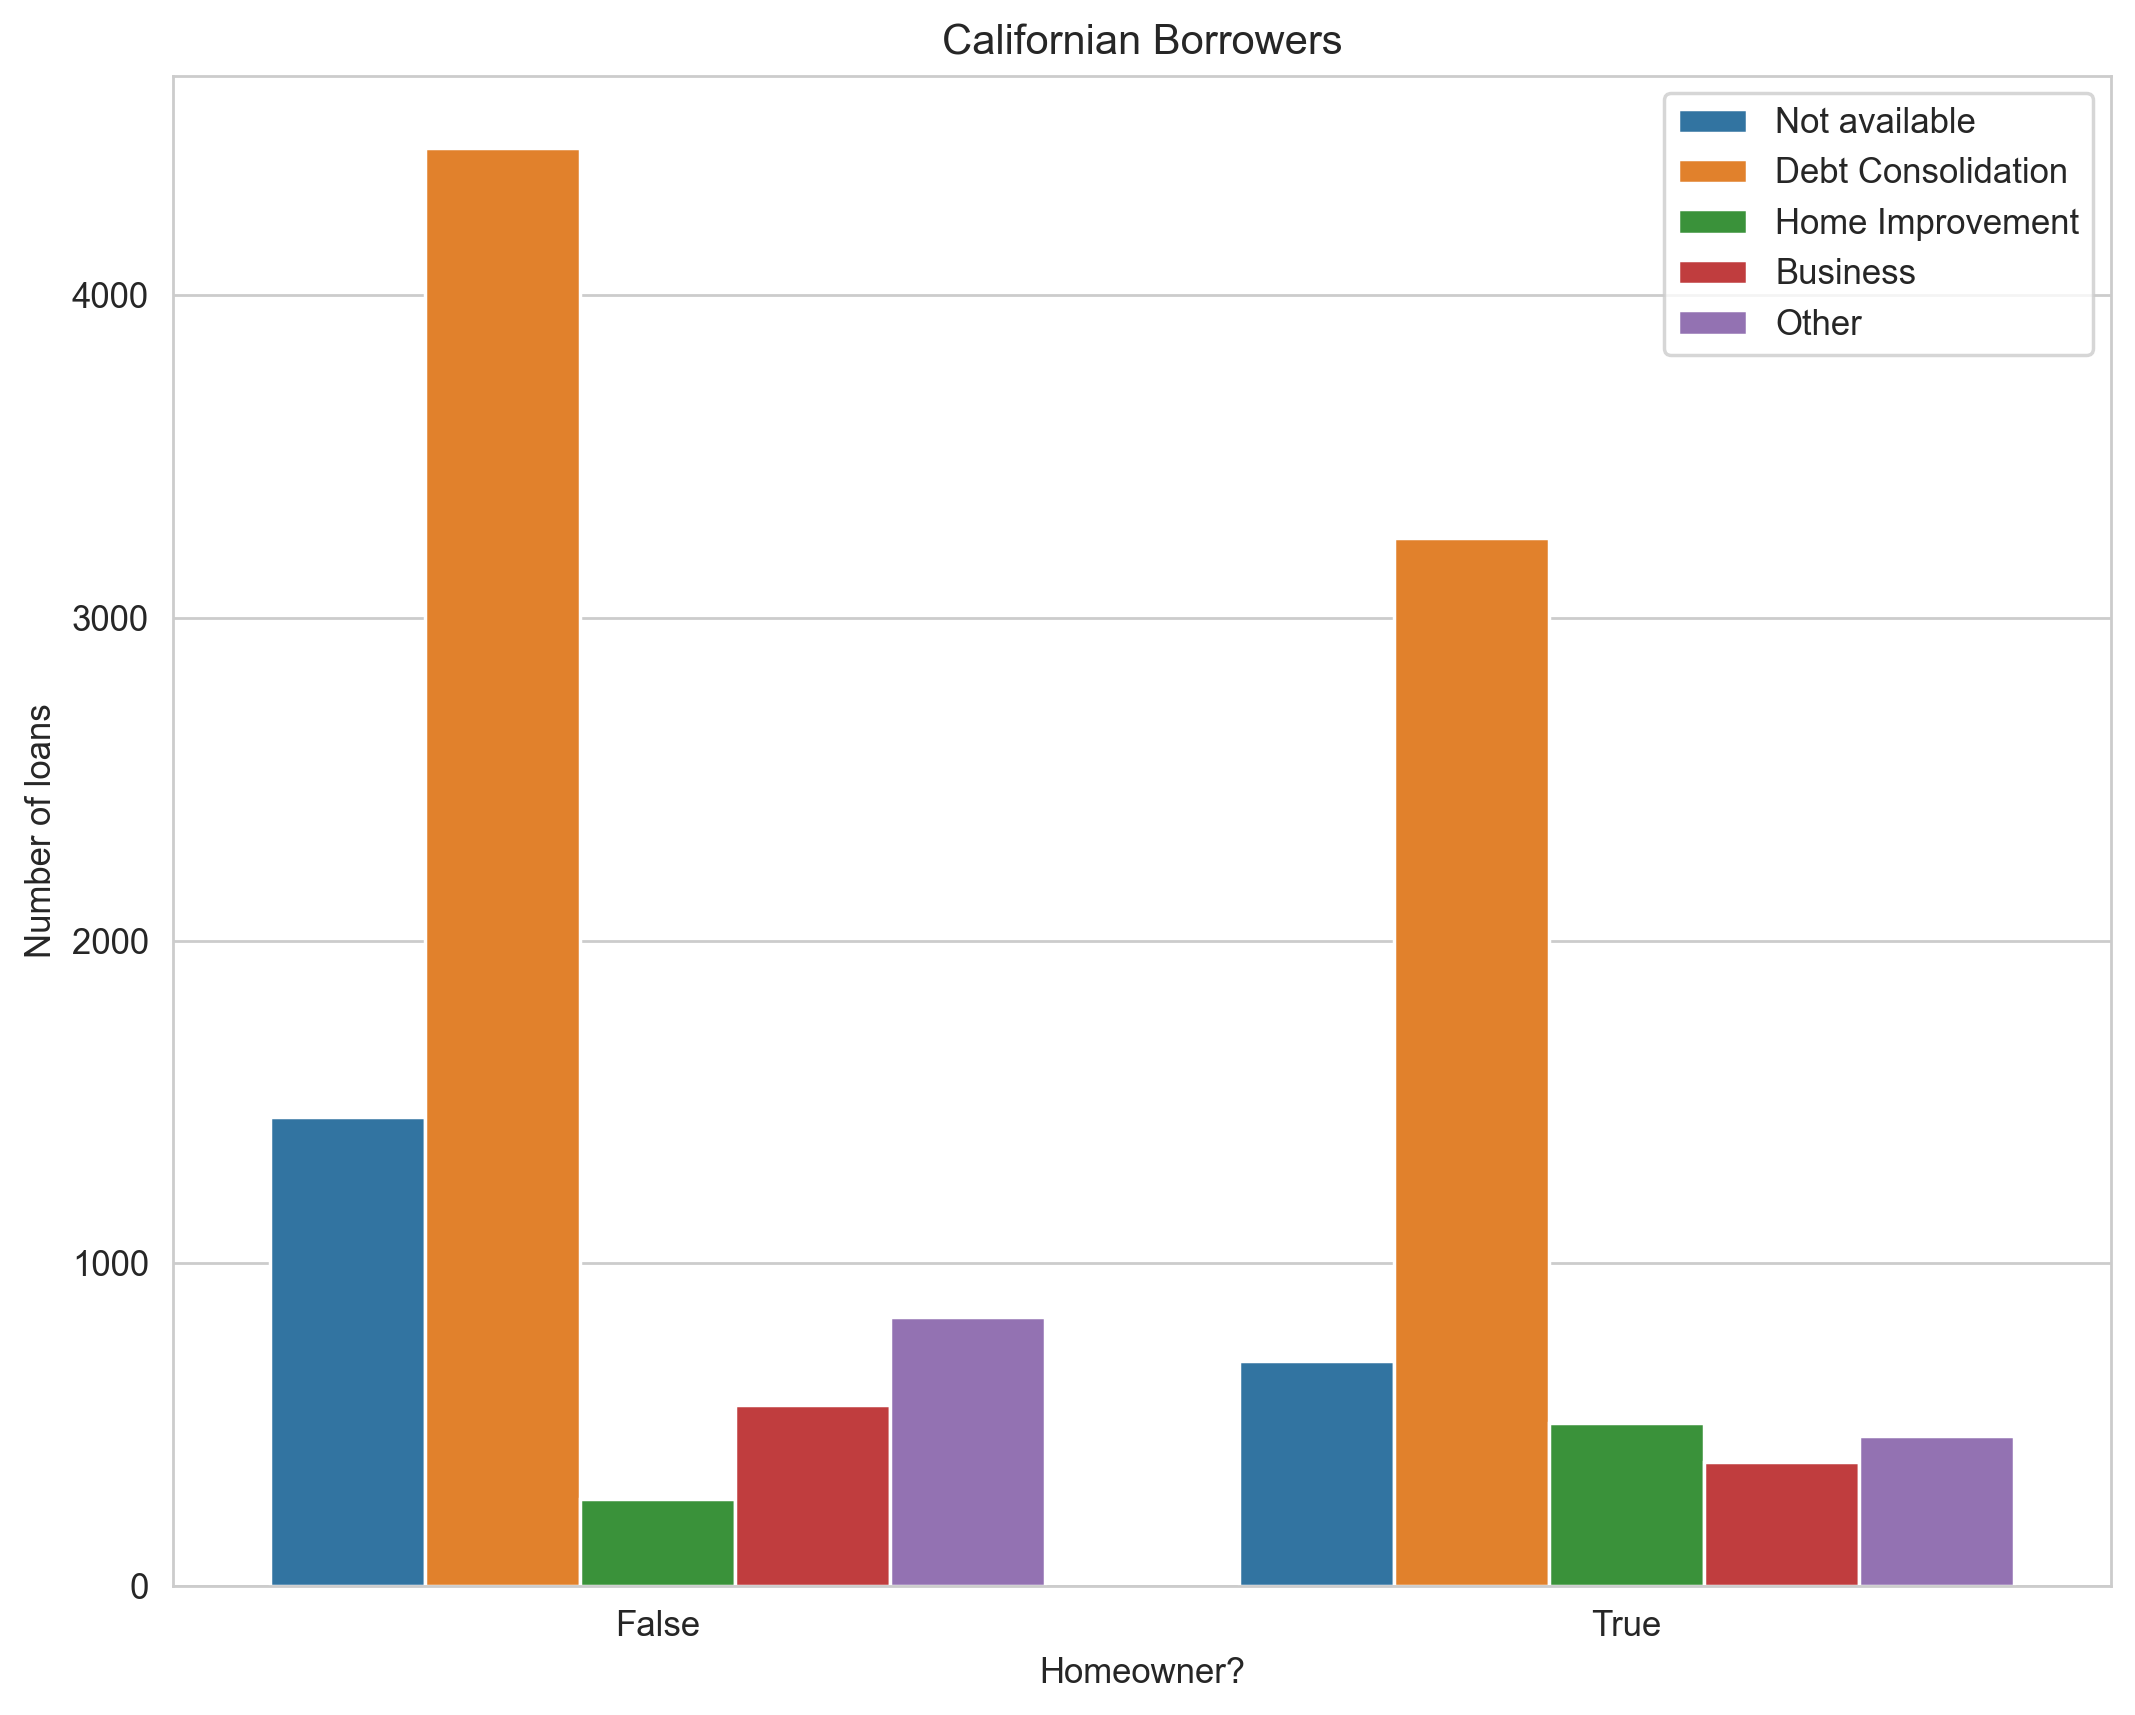

In [816]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
#use .loc to pull only the data from CA
cali = loans.loc[loans['BorrowerState']=='CA']
#add a title to the chart for clarity
plt.title('Californian Borrowers')
sns.countplot(x='IsBorrowerHomeowner', data = cali, hue ='ListingCategory (numeric)', hue_order = [0,1,2,3,7] );
plt.ylabel('Number of loans')
plt.xlabel('Homeowner?');
#create custom labels for the legend for clarity
my_labels = ['Not available','Debt Consolidation','Home Improvement','Business','Other']
plt.legend(labels = my_labels);

So we can see with this data that, at least in California, the majority of the borrowers are not, in fact, home owners, but the bulk of them still hold their loans in 'Debt Consolidation'. I'm curious as to what else I can discover with a closer look at California. 

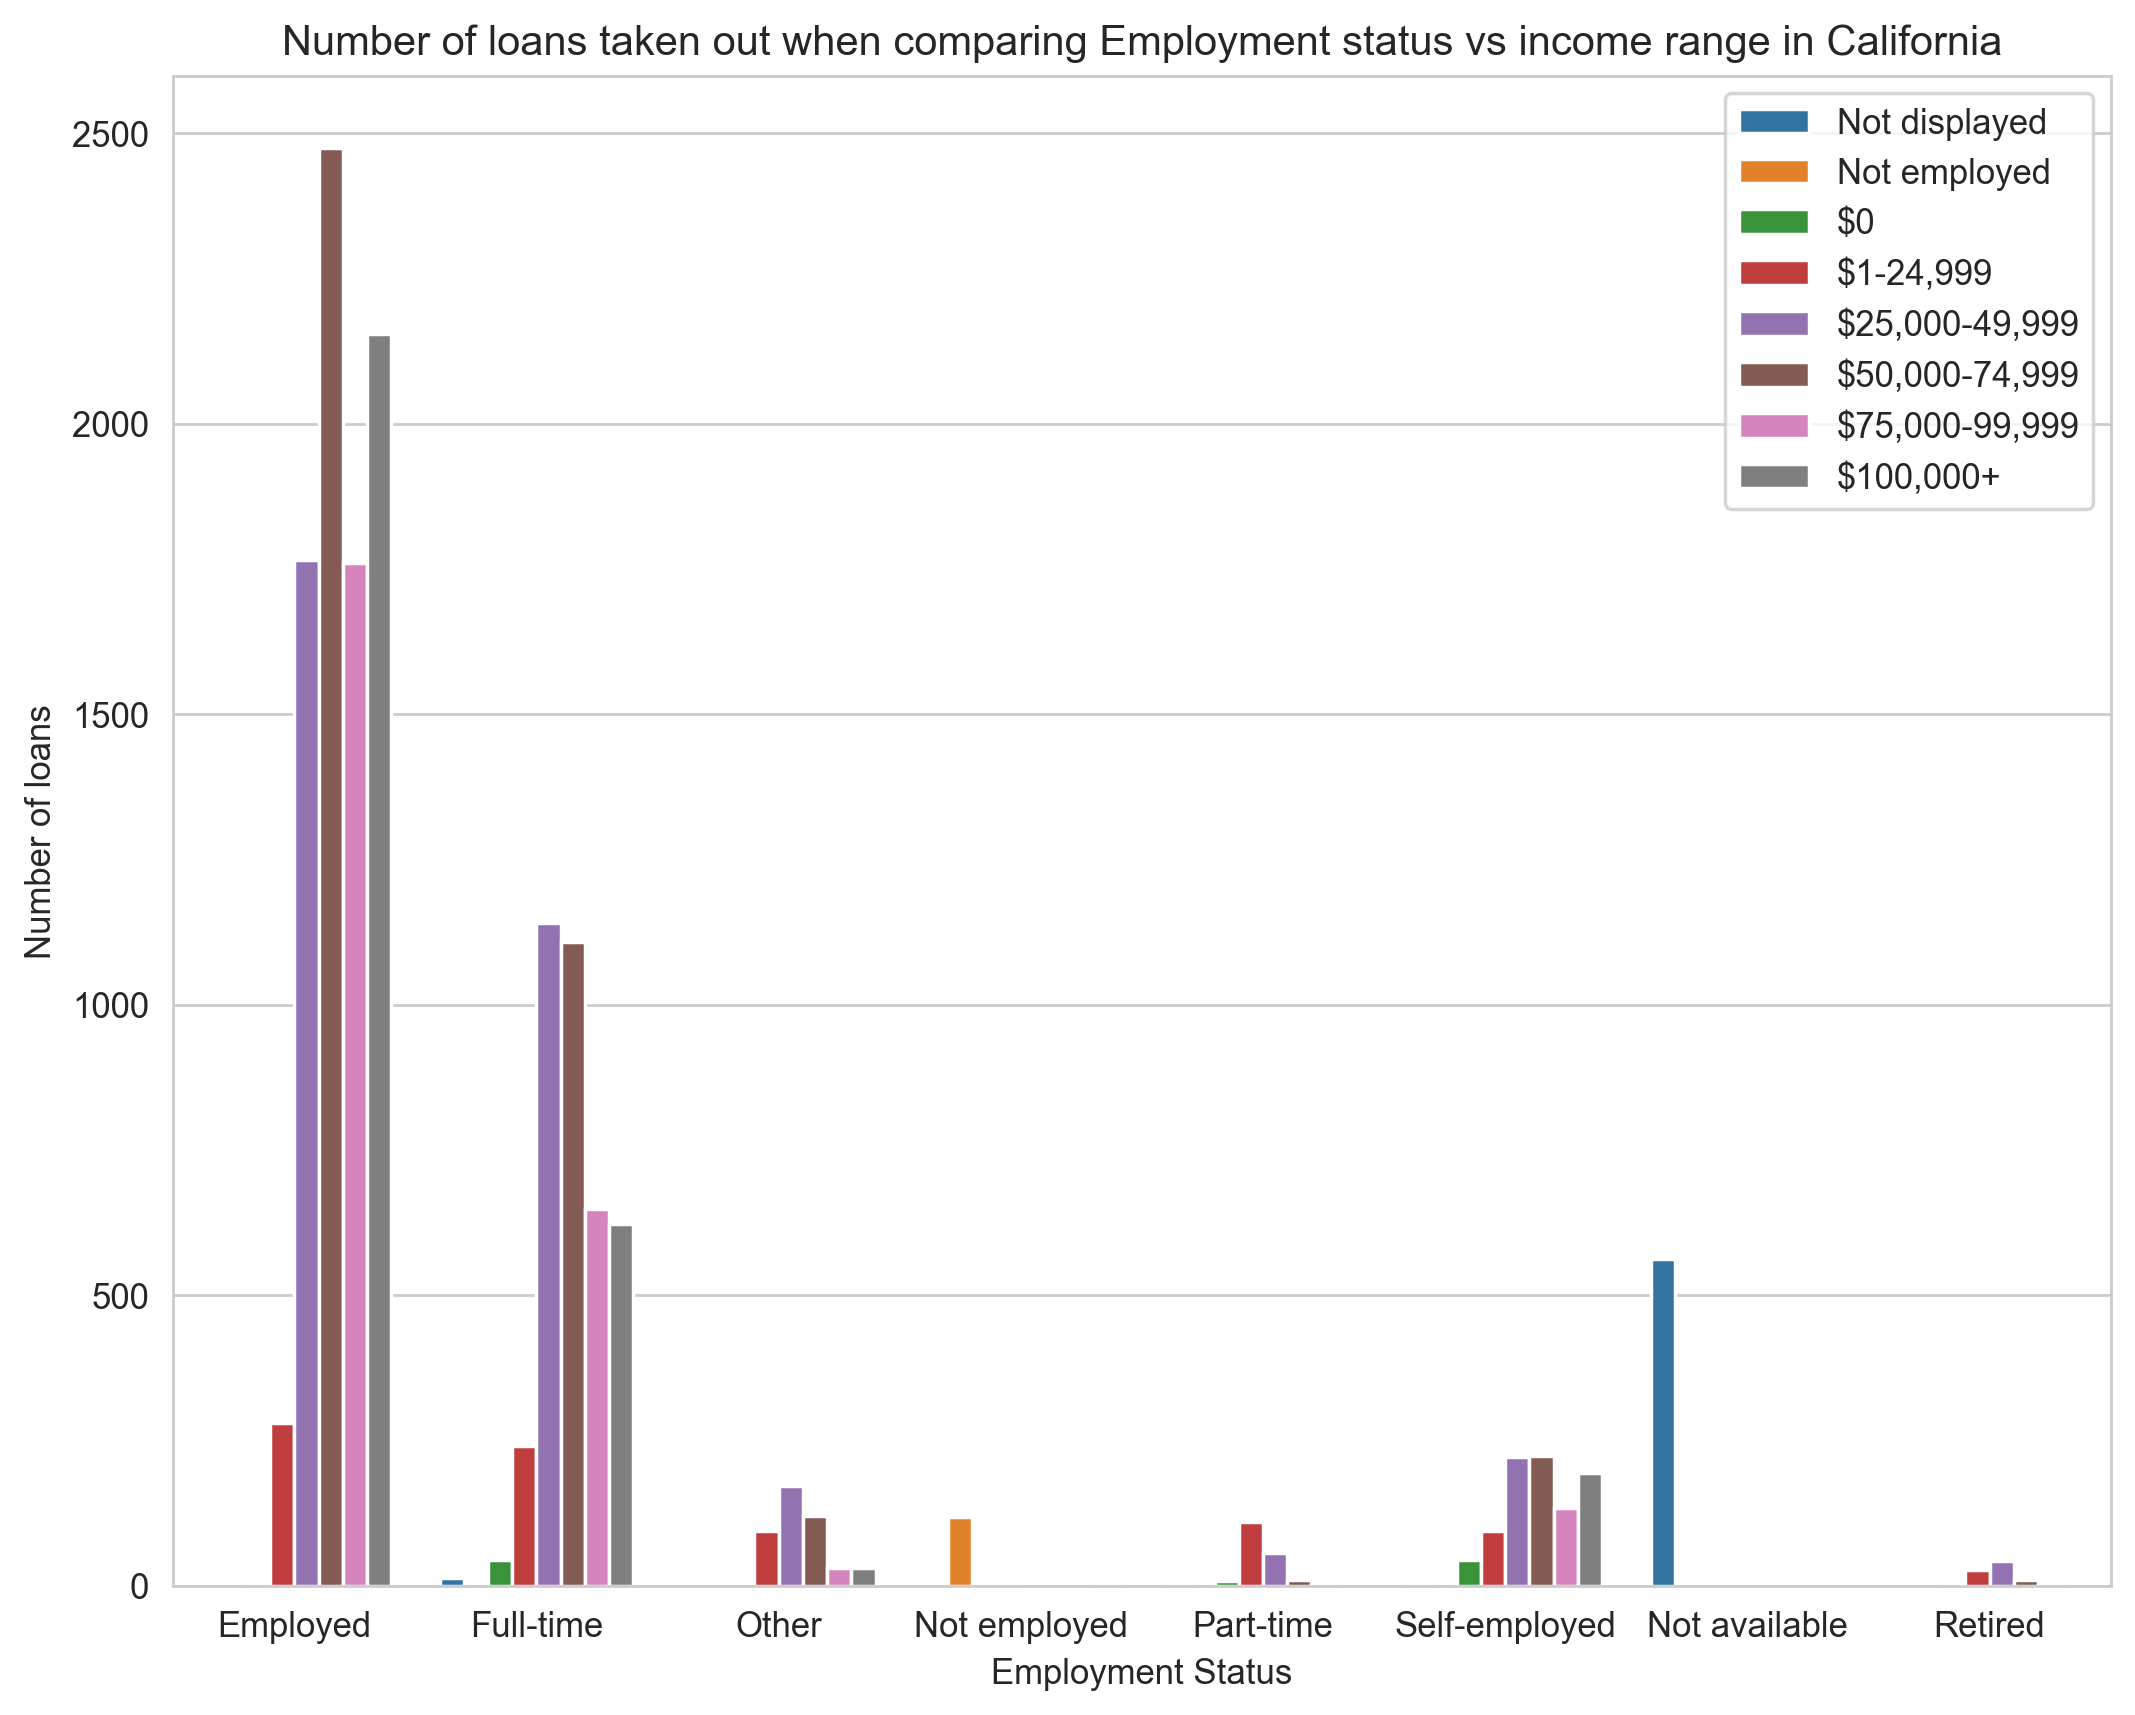

In [817]:
#let's have a look at employment status vs income range in California
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
sns.countplot(data=cali, x='EmploymentStatus', hue = 'IncomeRange' );
plt.legend(loc='upper right');
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')
plt.title('Number of loans taken out when comparing Employment status vs income range in California');

It seems that California is keeping in trend with most of their loans going to employed borrowers, with the 50k-75k range taking out the most loans. There is also a large number of loans granted to those in the 100k+ income range, and I'm curious to find out what types of loans are most popular per income range.

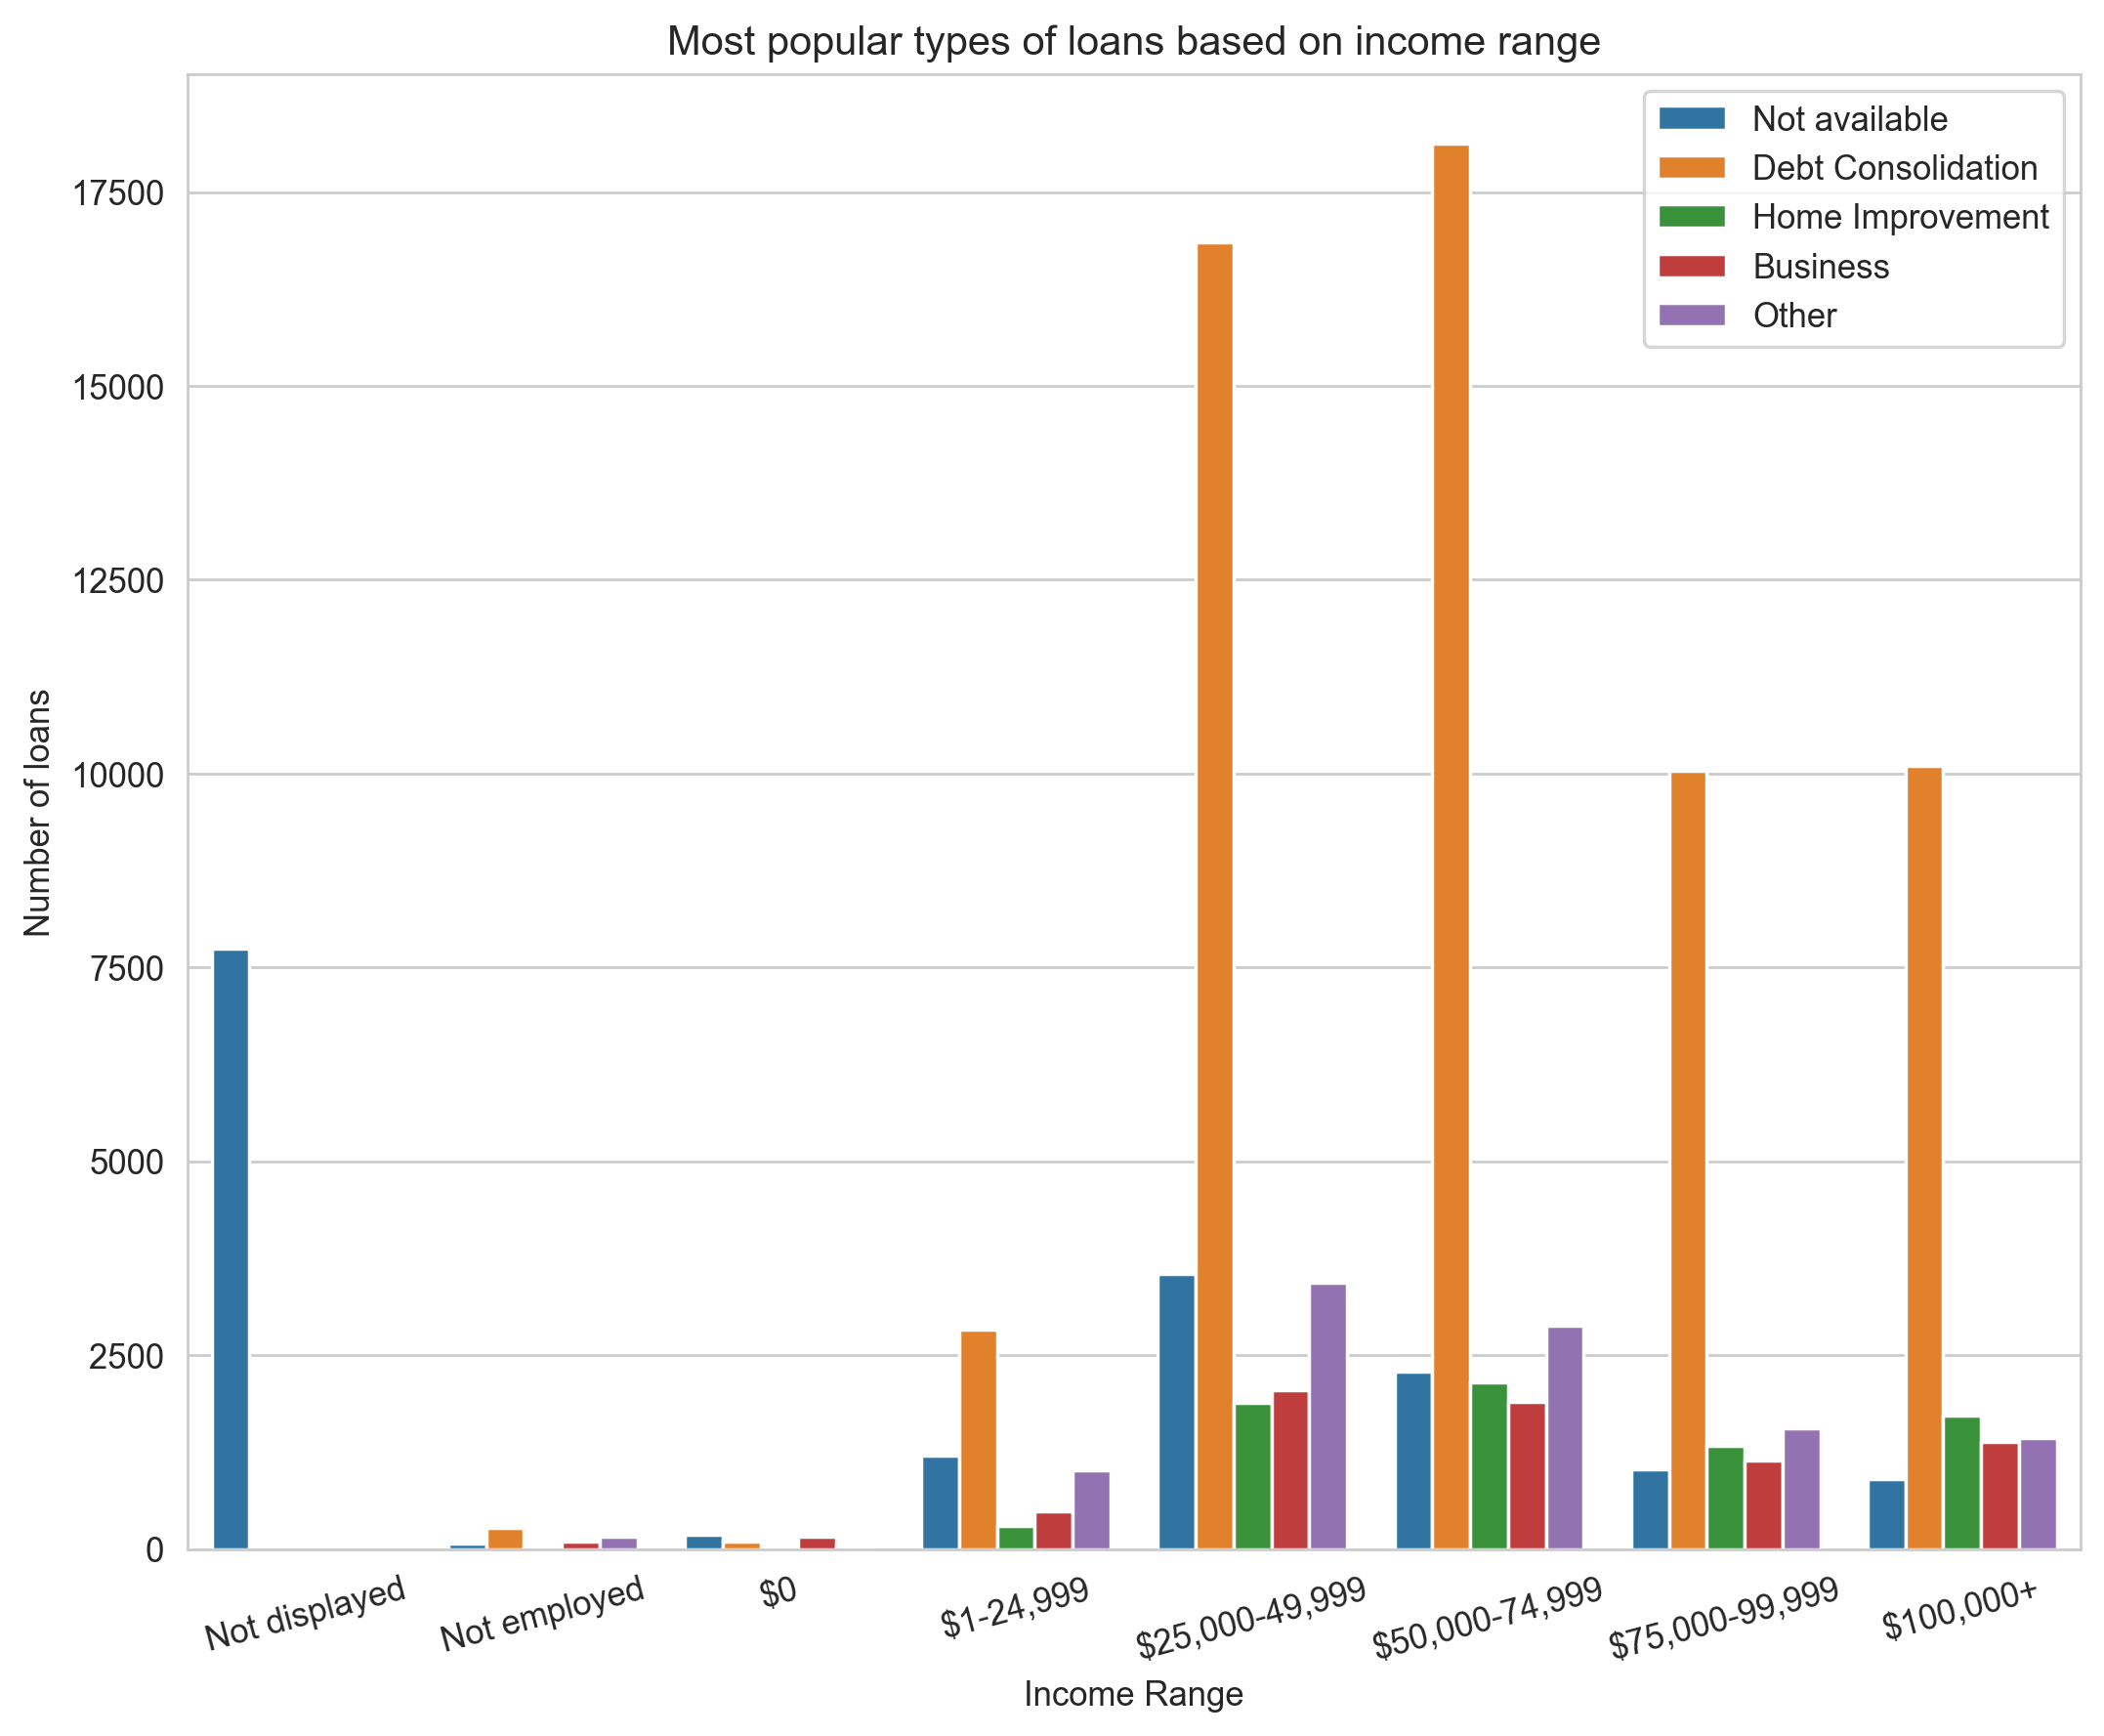

In [818]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8),dpi=250)
#let's get away from California and look at the big picture
sns.countplot(data=loans, x='IncomeRange', hue ='ListingCategory (numeric)', hue_order = [0,1,2,3,7]);
plt.xticks(rotation=15);
my_labels = ['Not available','Debt Consolidation','Home Improvement','Business','Other']
plt.legend(labels = my_labels);
plt.title('Most popular types of loans based on income range')
plt.xlabel('Income Range')
plt.ylabel('Number of loans');

Again we see the vast majority of loans across all stated income ranges is debt consolidation, with less loans going out to those borrowers in the higher income brackets. This raises the question of whether or not a person's income will impact their interest rate.

Let's explore this further.

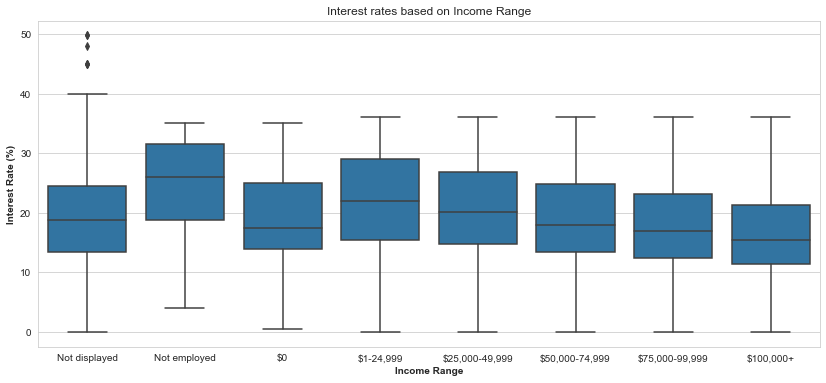

In [819]:
myBoxPlot(loans, 'IncomeRange', 'interest_perc')
plt.xlabel('Income Range')
plt.ylabel('Interest Rate (%)')
plt.title('Interest rates based on Income Range');

Just as I thought. Here we see that there is a negative correlation between income and interest rates when it comes to this dataset. While the minimum and maximum values are fairly consistent across all ranges, the median and interquartile ranges drop significantly as the borrower's income goes up. We see that borrowers in the sub 25k range have their median around 22% and their third quartile  hovering closer to 30%, while borrowers in the 100k+ income range have a median interest rate of around 15%, with their third quartile reaching around 21%. 

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

The total loan amout had a negative correlation with the interest rates in that, generally, the higher the loan amount, the lower the interest rate. Looking at the data, the correlation wasn't super strong, indicating that there are more factors at play when interest rates are being decided upon. Having a look at the types of loans, the employment status of the borrowers, and whether or not the borrower was a homeowner, and occasionally the borrower's home state, all seem to have an impact on the interest rate they could receive, but the largest contributing factor could very well be the income of the borrower. Borrowers in higher bracket income ranges enjoy, on average, much lower interest rates than those in the lower ranges (which make up the bulk of the loans taken out). 


### Did you observe any interesting relationships between the other features (not the main features of interest)?

It was interesting to see the differences between states and their cumulative interest rates. There was a bigger difference between some states than I would have initially thought, which could be related to the relative population of these states, but I won't know for sure until I have a closer look in the next section of my exploration.

## Multivariate Exploration

I want to do a deeper dive in comparing the factors I've explored in the previous step to see if certains conditions compound on eachother in a way that would impact interest rates.


First lets take a look at loan amounts and interest rates when categorized by income range.

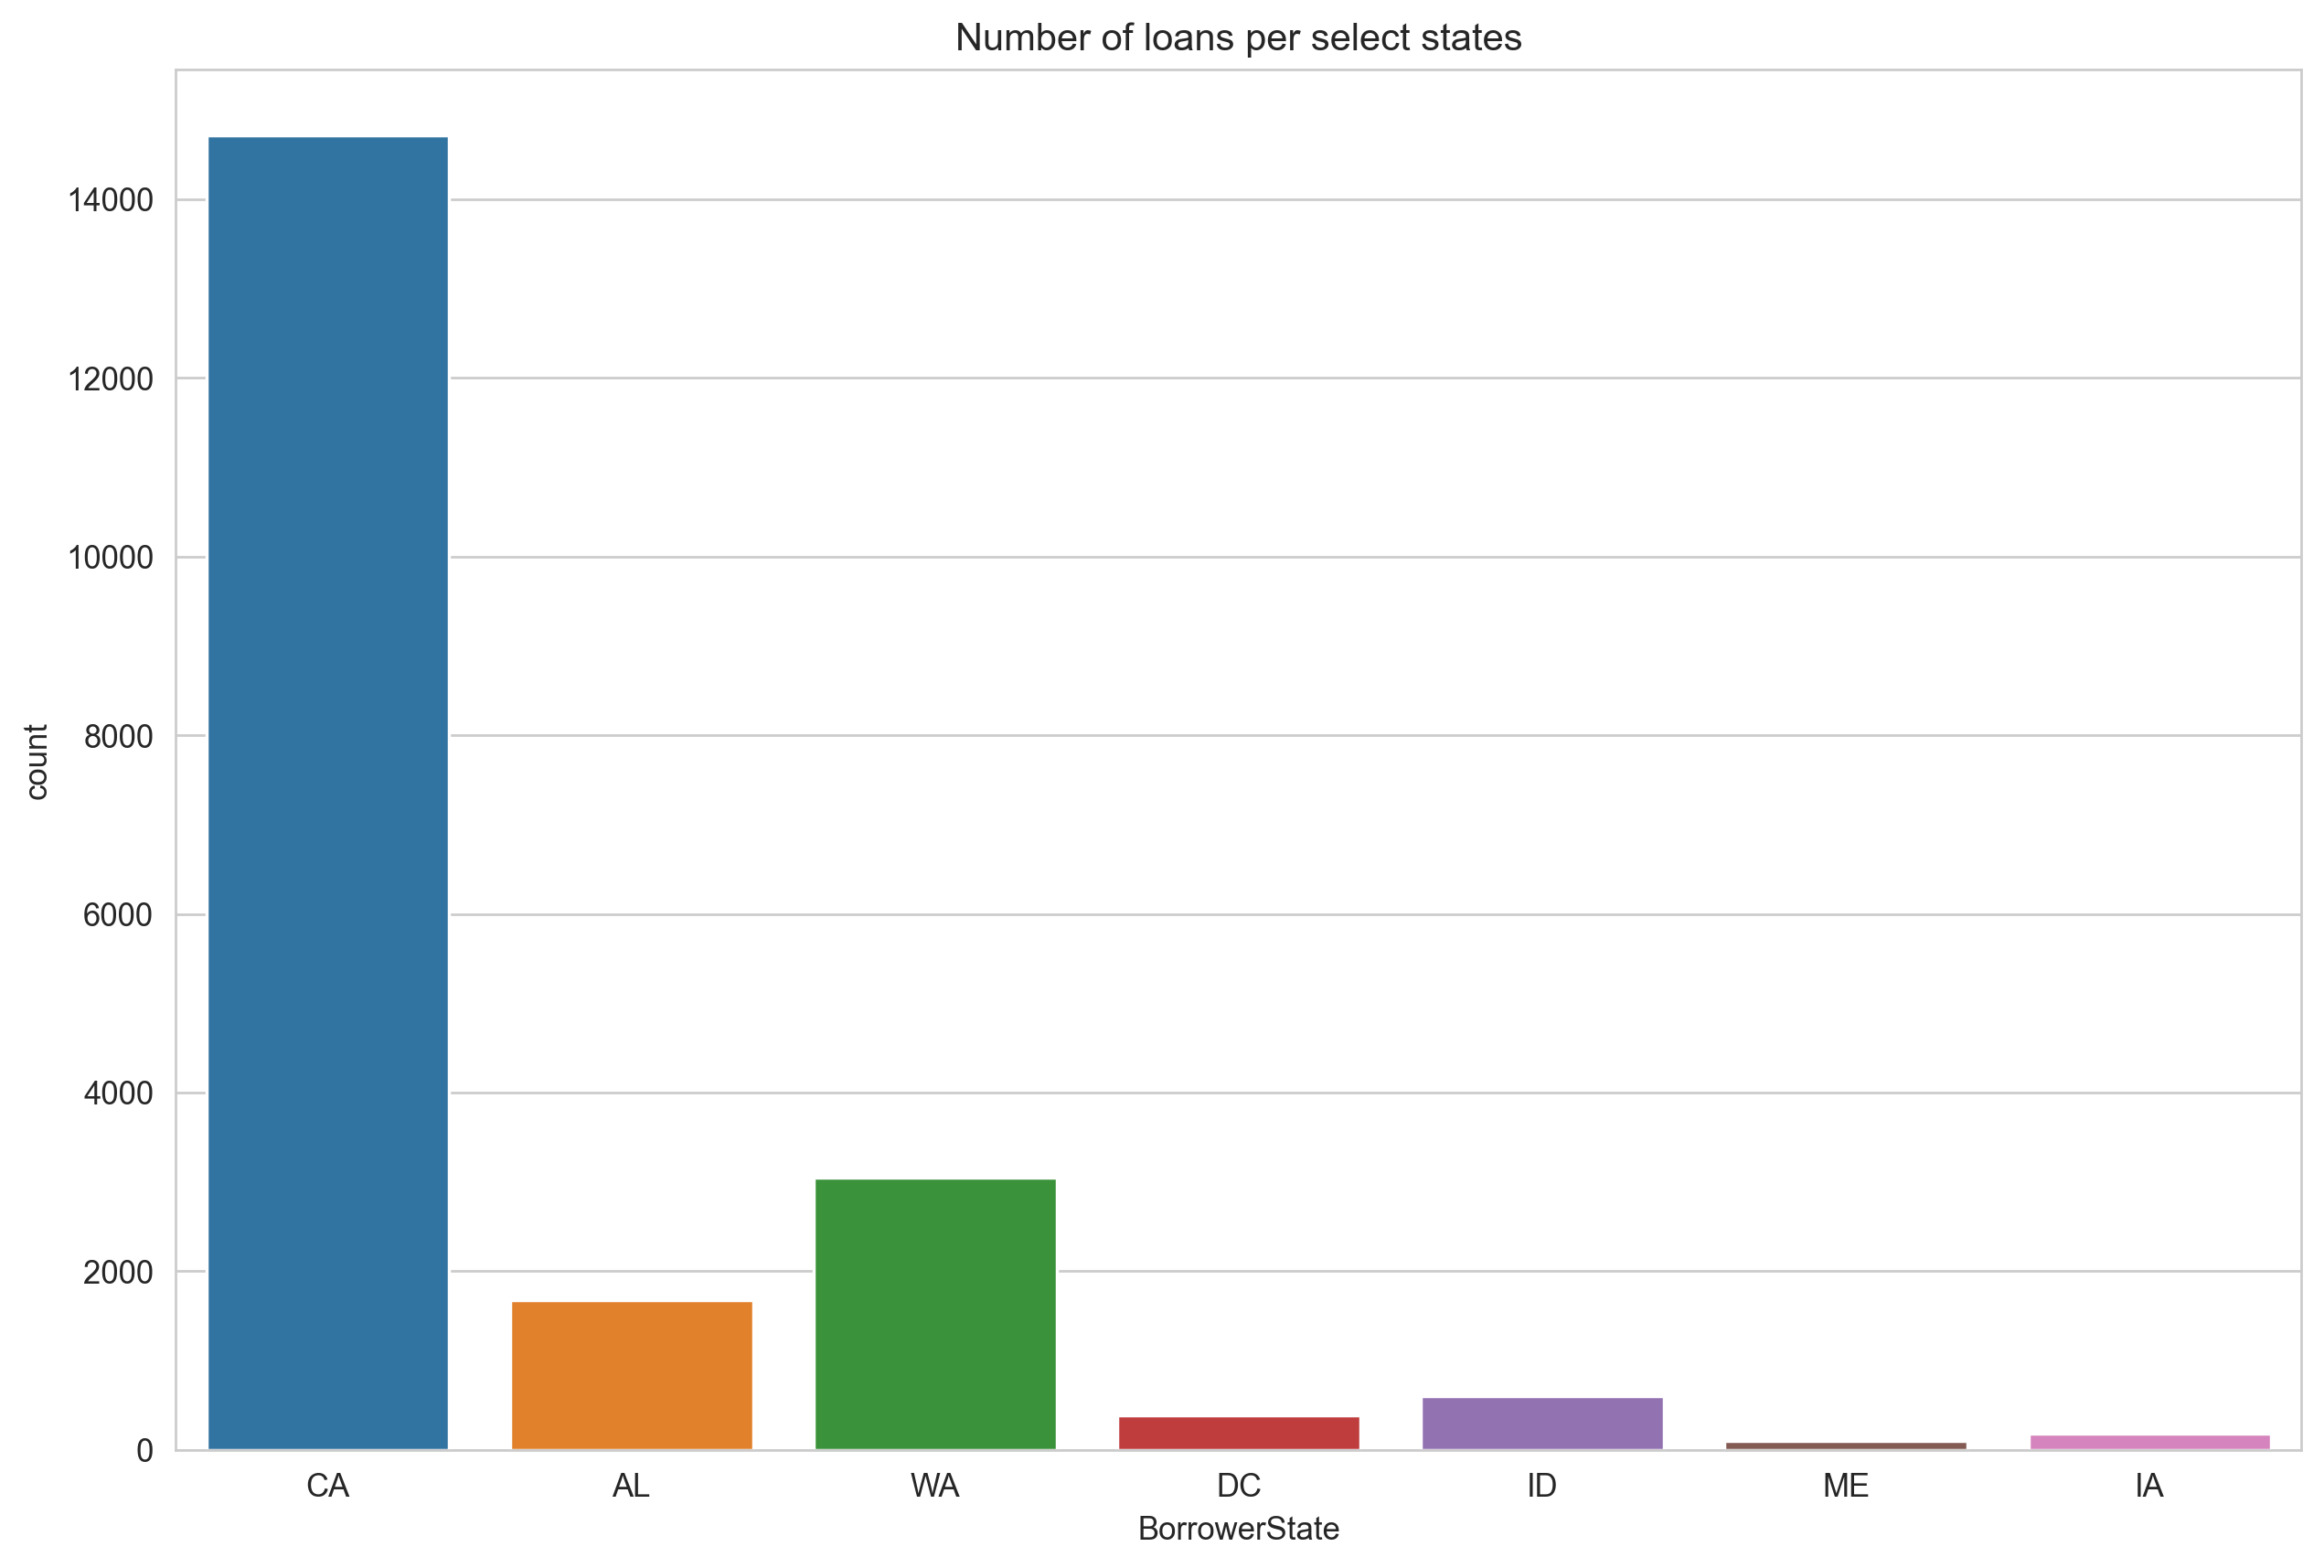

In [820]:
#before having a closer look at the states data, I wanted to select just a few from the entire set. I chose a handful of states that stood out from the data above.
select_states = loans.loc[(loans['BorrowerState']=='CA') | (loans['BorrowerState']=='AL') | (loans['BorrowerState']=='WA')|(loans['BorrowerState']=='DC')|(loans['BorrowerState']=='ID')|(loans['BorrowerState']=='ME')|(loans['BorrowerState']=="IA")]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8),dpi=250)
sns.countplot(data = select_states, x = "BorrowerState");
plt.title('Number of loans per select states');

This was done simply to get a glimpse at the amount of loans issued by each state that I'm doing a closer inspection of.

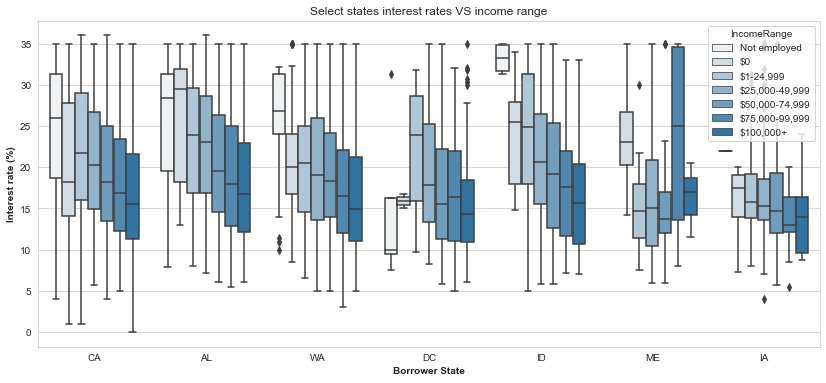

In [821]:
# I'll use a clustered box plot here to keep the visuals similar and easy to decipher
#I'll also create this list order for future use
income_order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
myBoxPlot(select_states, 'BorrowerState', 'interest_perc', hue='IncomeRange', hue_order= income_order)
plt.title('Select states interest rates VS income range')
plt.xlabel('Borrower State')
plt.ylabel('Interest rate (%)');

It's interesting to see here that, while California has the largest number of loans from any state, Alabama (AL) has, on average, higher interest rates. This would coinside with the data from an earlier graphic showing Alabama's above median interest rates when compared to the other states. Similarily, states like Maine (ME) and Iowa (IA) have much interest rates, although it seems as though Maine has quite a variance in interest rates for borrowers in the 75K-100K income range.

Let's see how this compares to the loan amounts in these same states.

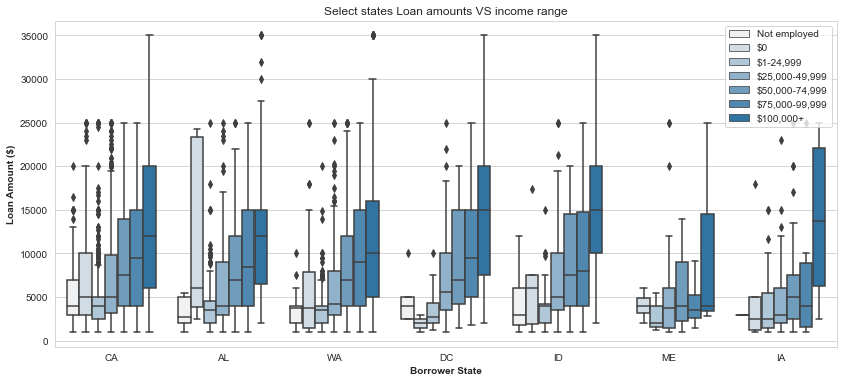

In [822]:
#same plot as before with a different y axis
myBoxPlot(select_states, 'BorrowerState', 'LoanOriginalAmount', hue='IncomeRange', hue_order = income_order)
plt.title('Select states Loan amounts VS income range')
plt.xlabel('Borrower State')
plt.ylabel('Loan Amount ($)');
plt.legend();

The first thing that stands out to me here is the large loan amounts in AL within the $0 income range. This could very well account for the higher interest rates statistic seen above, but it is intersting to see that, generally, the loan amounts in AL are not much higher than the other states (save the outliers above 30k, which, based on the income range, should have lower interest rates), yet they boast higher interest rates in general. 

I want to look now at the effect that loan type, in conjunction with income ranges, has on interest rates, but let's zoom back out to the entire dataset.

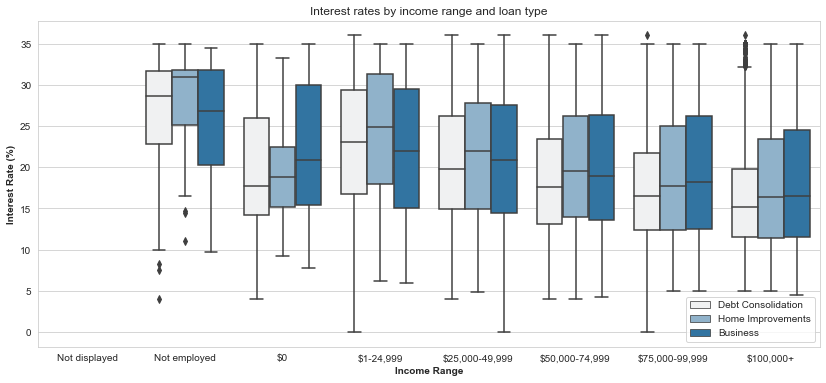

In [823]:
# Let's work with a clustered box plot
# This time I don't want to include the loan types of 'Not available' or 'Other', so I'll take those out of the hue order.
myBoxPlot(loans, 'IncomeRange', 'interest_perc', hue= 'ListingCategory (numeric)', hue_order = [1,2,3])
#I need to create a new list of labels to account for the adjustment to my hue order.
new_labels = ['Debt Consolidation', 'Home Improvements', 'Business']
plt.legend(labels = new_labels);
plt.xlabel('Income Range');
plt.ylabel('Interest Rate (%)')
plt.title('Interest rates by income range and loan type');

Now we get a clearer picture of the relationship between income ranges, loan types, and interest rates. There are two things that stick out to me here; namely the outliers. It looks like, while borrowers who are not employed usually see a higher interest rate (between roughly 21% and 32%), there are some exceptions in the outliers that come in at a much lower interest rate (between roughly 4% and 14%). 

Contrarily, borrowers in the 100k+ income range, while mostly enjoying much lower interest rates when compared to the other income ranges, see a number of outliers ranging between 33%-37%, specifically in the debt consolidation loan type. 

Another thing worth noting is that it seems as though debt consolidation loans almost always have a lower interest rate applied to them when compared to business and home improvement loans. It's interesting to see how the interest rates for home improvement loans start to creep below the rates of business loans as you move up through the income ranges.

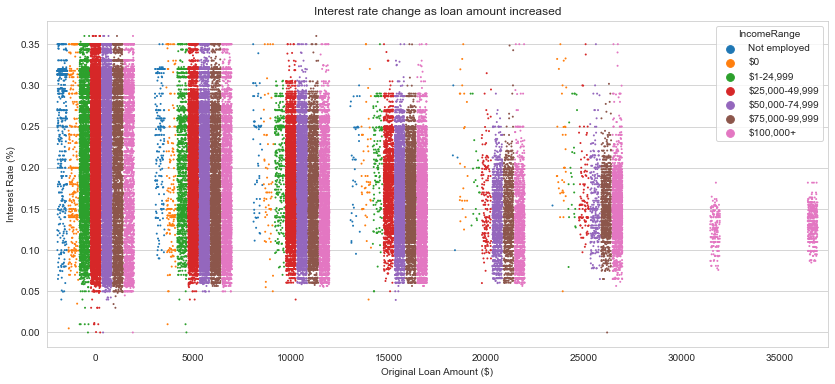

In [824]:
plt.figure(figsize=(14,6))

#create intervals for x axis using floor division
data=loans.dropna(subset=['LoanOriginalAmount']).copy()
data['LoanOriginalAmount_int']=((data['LoanOriginalAmount']//5000)*5000).astype(int)
#use a stripplot to avoid over plotting and adjust jitter for clarity.
sns.stripplot(data=data, x='LoanOriginalAmount_int', y='BorrowerRate', hue='IncomeRange', hue_order = income_order, order=None, size=2, jitter=0.35, dodge=True);
plt.title('Interest rate change as loan amount increased');
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Interest Rate (%)');

This graphic further supports the correlation between income range, loan amount, and interest rates, showing that as the loan amount increases, the interest rate drops and the income range increases. This supports the other data we've look at thus far. As this is a sampling of the data, there is a few expected outliers from time to time, but the heart of the data remains the same. 

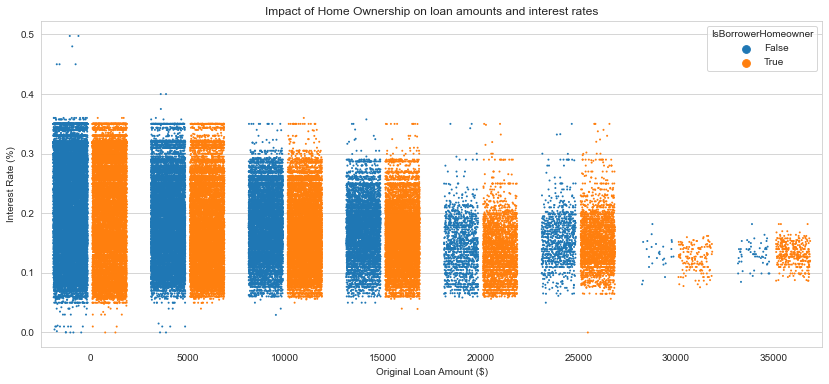

In [825]:
plt.figure(figsize=(14,6))

sns.stripplot(data=data, x='LoanOriginalAmount_int', y='BorrowerRate', hue='IsBorrowerHomeowner', order=None, size=2, jitter=0.35, dodge=True);
plt.title('Impact of Home Ownership on loan amounts and interest rates');
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Interest Rate (%)');

Interestingly, given this data, the weight of owning a home doesn't seem to have as much of an impact until the loan amounts reach the amount of $20,000, and even then the correlation is not very strong, but I want to have a closer look at how home ownership is related to loan amounts.

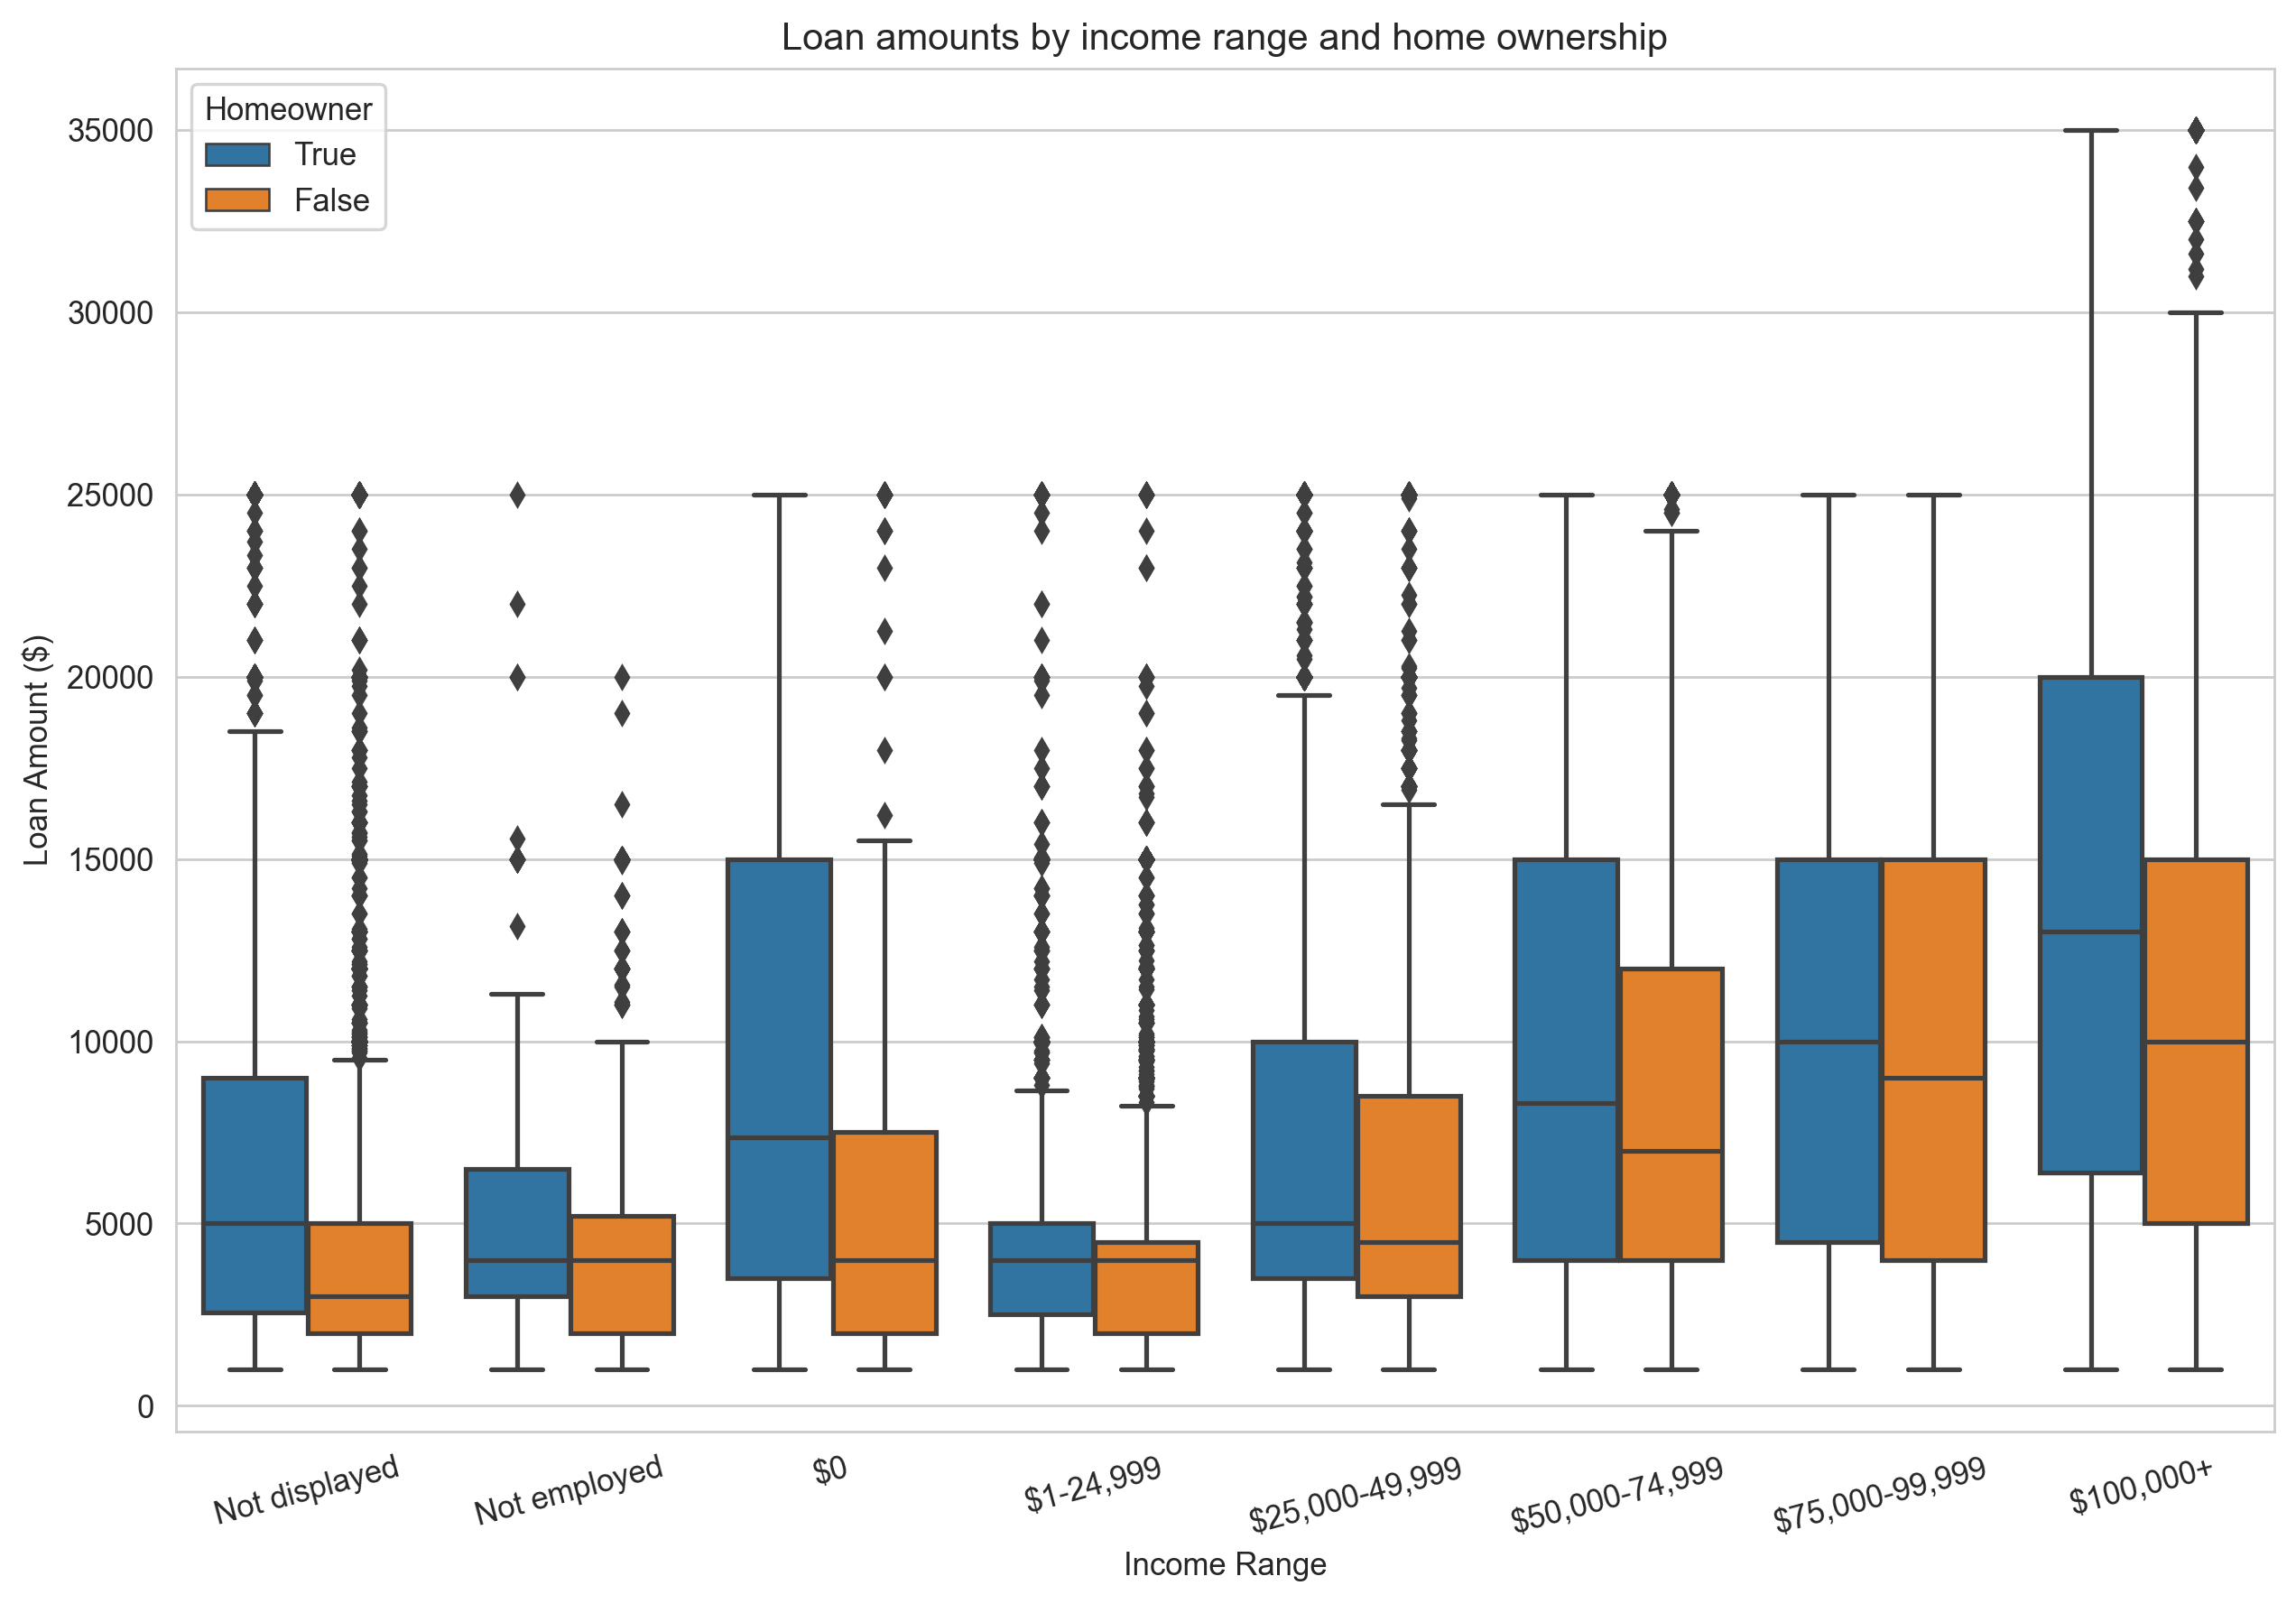

In [826]:
# Let's work with a clustered box plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8),dpi=250)
sns.boxplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', hue_order = [True, False]);
plt.xticks(rotation=15);
plt.legend(title = 'Homeowner')
plt.xlabel('Income Range');
plt.ylabel('Loan Amount ($)')
plt.title('Loan amounts by income range and home ownership');

Here we get a bit of a better picture of how home ownership is related to loan amounts. Consistently, home owners tend to take out larger loans than those who do not own a home. One thing to note here is the big difference in the $0 income range. Homeowners here seem to enjoy a much larger loan amount against the non-home owner. There is also a noticeable difference in the 100K income range in favor of home owners. This reveals a stronger relationship than we've previously seen.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your features of interest?

With my original look at the different states and their interest rates, it seemed as though the borrower's home state could have an impact on interest rates on its own, but with a closer look at some key states, it seems as though the data was simply reflecting the nature of the loans taken out in each state. Looking at Alabama specifically, while they are issuing more high value loans (which would imply lower interest rates based on our previous explorations), these loans are being taken out by borrowers in lower income range brackets, thus incurring higher interest rates.

The regression plot containing loan amounts, interest rates, and income ranges further strengthened the notion that higher loan amounts and higher income relate stronly to lower interest rates. That being said, higher value loans taken out by borrowers in lower income ranges will see higher interest rates, so these two factors do not work in tandem in that sense. 

Homeownership does not seem to share as strong of a correlation on its own to interest rates, but the relationship does strenghthen once loans surpass the $10,000 range.

### Were there any interesting or surprising interactions between features?

Getting a more in depth look at the relationships between loan amounts, interest rates, and loan types granted some interesting data. I found that the interest rates for debt consolidation loans (being the most common by far) are consistently lower when compared to the other more common loan types, across all income ranges. Home improvement loans generally held a higher interest rate compared to the others, but I observed that as these rates get lower as the income range increases (much like the other loan types), business loans become the loans with the highest interest rate in the 75K and above range.


## Conclusion

My goal during the exploration of this data was to discover relationships between the loans being taken out and the borrower's individual details. I wanted to explore which conditions may have an effect on a loans interest rate and loan amount.  

Ultimately, while I found most of the relationships reflected what I thought they might before I started this exploration (such as lower interest rates being granted to those with a higher income or loans of a larger amount), I did find some interesting affectations and peculiar relationships that I would not have otherwise been able to find. For example, I would not have guessed that the most common type of loan was that of debt consolidation (across all income ranges), nor would I have been able to predict the variance of loans between states.

In conclusion, I am satisfied with my findings regarding the relationships explored regarding the Prosper Loan data and hope that my findings can be used for a more in depth understaing of the individual factors that have an impact on present or future borrowers.